In [255]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
%config InlineBackend.figure_formats = set(['retina'])
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.ticker as ticker

**Table of Contents**

1. Section 1: Introduction
      * 1.1: Outline
2. Section 2: Load and Prepare the data
      * 2.1: Introducing data set
      * 2.2: Loading data
      * 2.3: Separating Region and Area data
      * 2.4: Assigning regions to Area data
      * 2.5: Missing values
3. Section 3: Property price trends in each regions 
      * 3.1: Overall Trend
      * 3.2: Comparing trends in regions
      * 3.3: Comparing price range of two properties
4. Section 4: Flat price changes
      * 4.1: Calculating price change of flat in each area between July 2017 and July 2018
      * 4.2: Flat price changes in regions
      * 4.3: Flat price changes in areas
5. Section 5: Statistical Analysis
      * 5.1: Contingency table of number of areas in which the price has increased and the number has decreased, by region
      * 5.2: Chi-square test to regions differ
      * 5.3: Conclusion


## Section 1. Introduction
This notebook presents an analysis of average property prices in 9 regions(154 areas) over 36 months.  The aim of the analysis is to compare the property price trends over 36 months in each region and area and see price changes of flats in different regions and areas.

#### 1.1 Outline
Section 2 loads the data and separates into 2 data from average property prices. Section 3 plots trends of Flat and Detached properties over 36 months so that the comparison between price changes in each region can be understood. In Section 4, Price changes of flats in each between July 2017 and July 2018 are plotted in different regions and areas. In Section 5, the Contingency table of a number of areas in which the price has increased and the number has decreased, by region is created to see if regions differ.


## Section 2. Load and Prepare the data
In this section, Region and Area data are separated for further use in the next sections and missing values in those data are handled.
#### 2.1 Introducing data set

The file average-property-price.csv has information about the average price of 4 type of properties over 36 months in different areas of the country.

The dataset contains the following fields:

| Name      |      Description             | 
|:--------------|:-----------------------------|
|Date   | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total.| 
|Area       | The name of an area |
|Code      | The code for the area| 
|Detached  | Average sale price of a detached property in this area in the month|
|Semi     | Same, for semi-detached property|
|Terraced | Same, for a terraced property|
|Flat | Same, for a flat|

The Area Codes are defined by the Office for National Statistics (ONS) and reflect the hierarchy of government in the UK.

In the provided data:
• Each area of the country is covered twice, at different levels.
• Level 1 is a region. There are 9 regions in England (examples are ‘London’, ‘South East’, and ‘South West’).
• Level 2 is a local government area. Each area belongs to one of the regions.

The following table shows the prefixes of the Area Code and the corresponding level.


| Code Prefix      |Classification | Level | Description|
|:--------------|:-----------------------------|:--------------|:------------|
|E12   | English Region| 1 | One of 9 different English regions
|E10       | County | 2 | Local government area. Parts of a region|
|E09      | London Borough| 2 | Local government area. Parts of a region|
|E08  | Metropolitan Boroughs| 2 | Local government area. Parts of a region|
|E06     | English unitary authority| 2 |Local government area. Parts of a region|


#### 2.2  Loading data

As described above, the file average-property-price is loaded from a CSV file. The 'Date' variable is converted to the DateTime object of Year-Day-Month so that it can be used for plotting trends in the next sections.

In [256]:
import datetime
# loading data
prices = pd.read_csv('average-property-price.csv') 
# converting to datetime object
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
prices.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01


#### 2.3 Separating Region and Area data

As described above, the file average-property-price.csv includes both data for areas and for regions. Both region and area data need to be separated so that we can analyze correctly price trends in the next sections.

As described below in the table, 'Region' is separated by starting with the E12 code and 'Area' is separated by starting with other codes except for E12.
* <font color='red'> Region </font> is average price of 4 properties in 9 regions over 36 months
* <font color='red'> Area </font> is average price of 4 properties in different areas over 36 months

The following table shows the prefixes of the Area Code and the corresponding level.


| Code Prefix      |Classification | Level | Description|
|:--------------|:-----------------------------|:--------------|:------------|
|E12   | English Region| 1 | One of 9 different English regions
|E10       | County | 2 | Local government area. Parts of a region|
|E09      | London Borough| 2 | Local government area. Parts of a region|
|E08  | Metropolitan Boroughs| 2 | Local government area. Parts of a region|
|E06     | English unitary authority| 2 |Local government area. Parts of a region|

In [257]:
# Separating data starts with 'E12'code
Region = prices.loc[prices.Code.str.startswith('E12')]
# Separating data starts without 'E12'code
Area = prices.loc[~prices.Code.str.startswith('E12')]

#### 2.4  Assigning regions to Area data
A separate file location-codes.csv shows which region each area belongs to.

* The location codes file is loaded from a CSV file, which has 4 variables (Authority code, Authority Name, Region code,  and Region name), which are the same variables in average property price file except for Region name.

Using the ‘location code’ data file, RegionName is added to <font color='red'> Area </font> so that we can understand which area belongs to which region.

* By using the merge function, two files are merged into one data frame. Unnecessary columns such as <font color='red'> 'AuthorityCode','AuthorityName','RegionCode' </font> are dropped
*  <font color='red'> Area </font> is average price of 4 properties in different areas over 36 months including 'RegionName'

In [258]:
#Loading data
location = pd.read_csv('location-codes.csv')
location.head()

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


In [259]:
#Merging two data with 'Code' and 'AuthorityCode'
Area = Area.merge(location, left_on = 'Code', right_on = 'AuthorityCode')
#Removing unneccasary columns
Area = Area.drop(axis = 1, columns = ['AuthorityCode','AuthorityName','RegionCode'])
Area.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East


<font color='blue'> Comment: </font>
* As we can see from above, RegionName is added to the table

#### 2.5 Missing values


Checking the data for missing values in the Region and Area data.
* Missing values ('?') are replaced with NaN.
* Missing values are shown in each variables of <font color='red'> Region and Area</font> data
* Locating missing values in the data

In [260]:
# Replacing missing values as NaN
Region = Region.replace('?',np.NaN)

print('Number of instances = %d' % (Region.shape[0]))
print('Number of attributes = %d' % (Region.shape[1]))

print('Number of missing values:')
for col in Region.columns:
    print('\t%s: %d' % (col,Region[col].isna().sum()))

Number of instances = 324
Number of attributes = 7
Number of missing values:
	Area: 0
	Code: 0
	Detached: 0
	Semi: 0
	Terraced: 0
	Flat: 0
	Month: 0


<font color='blue'> Comment: </font>
* There are no missing values in Region data.

In [261]:
Area = Area.replace('?',np.NaN)

print('Number of instances = %d' % (Area.shape[0]))
print('Number of attributes = %d' % (Area.shape[1]))

print('Number of missing values:')
for col in Area.columns:
    print('\t%s: %d' % (col,Area[col].isna().sum()))

Number of instances = 5436
Number of attributes = 8
Number of missing values:
	Area: 0
	Code: 0
	Detached: 36
	Semi: 36
	Terraced: 20
	Flat: 0
	Month: 0
	RegionName: 0


In [262]:
#Locating missing values
Area.loc[Area.Area == 'City of London'].isnull().sum()

Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
Month          0
RegionName     0
dtype: int64

<font color='blue'> Comment : </font>
* There are missing values in Detached, Semi, and Terraced properties.
* Since we will be using only Flat prices in section 3 for price changes, it is better to leave them as NaN values. Because it won't affect the aim of this notebook.
* if we are using other properties to analyze price changes in areas, filling with mean, deletion, and other approaches will be considered. For example, Missing values are in the only City of London, which is the heart of London meaning higher prices than any other area. We can fill in missing values with average mean prices of expensive areas such as Kensington and Chelsea.

## Section 3. Property price trends in 9 regions 

In this section, Price of flat and detached properties are visualized and compared over 36 months.

#### 3.1 Overall trend

* Prices of flat and detached properties over 36 months in 9 regions are shown below
* x-axis shows months and y axis shows prices
* Regions are shown in legend box with different colors

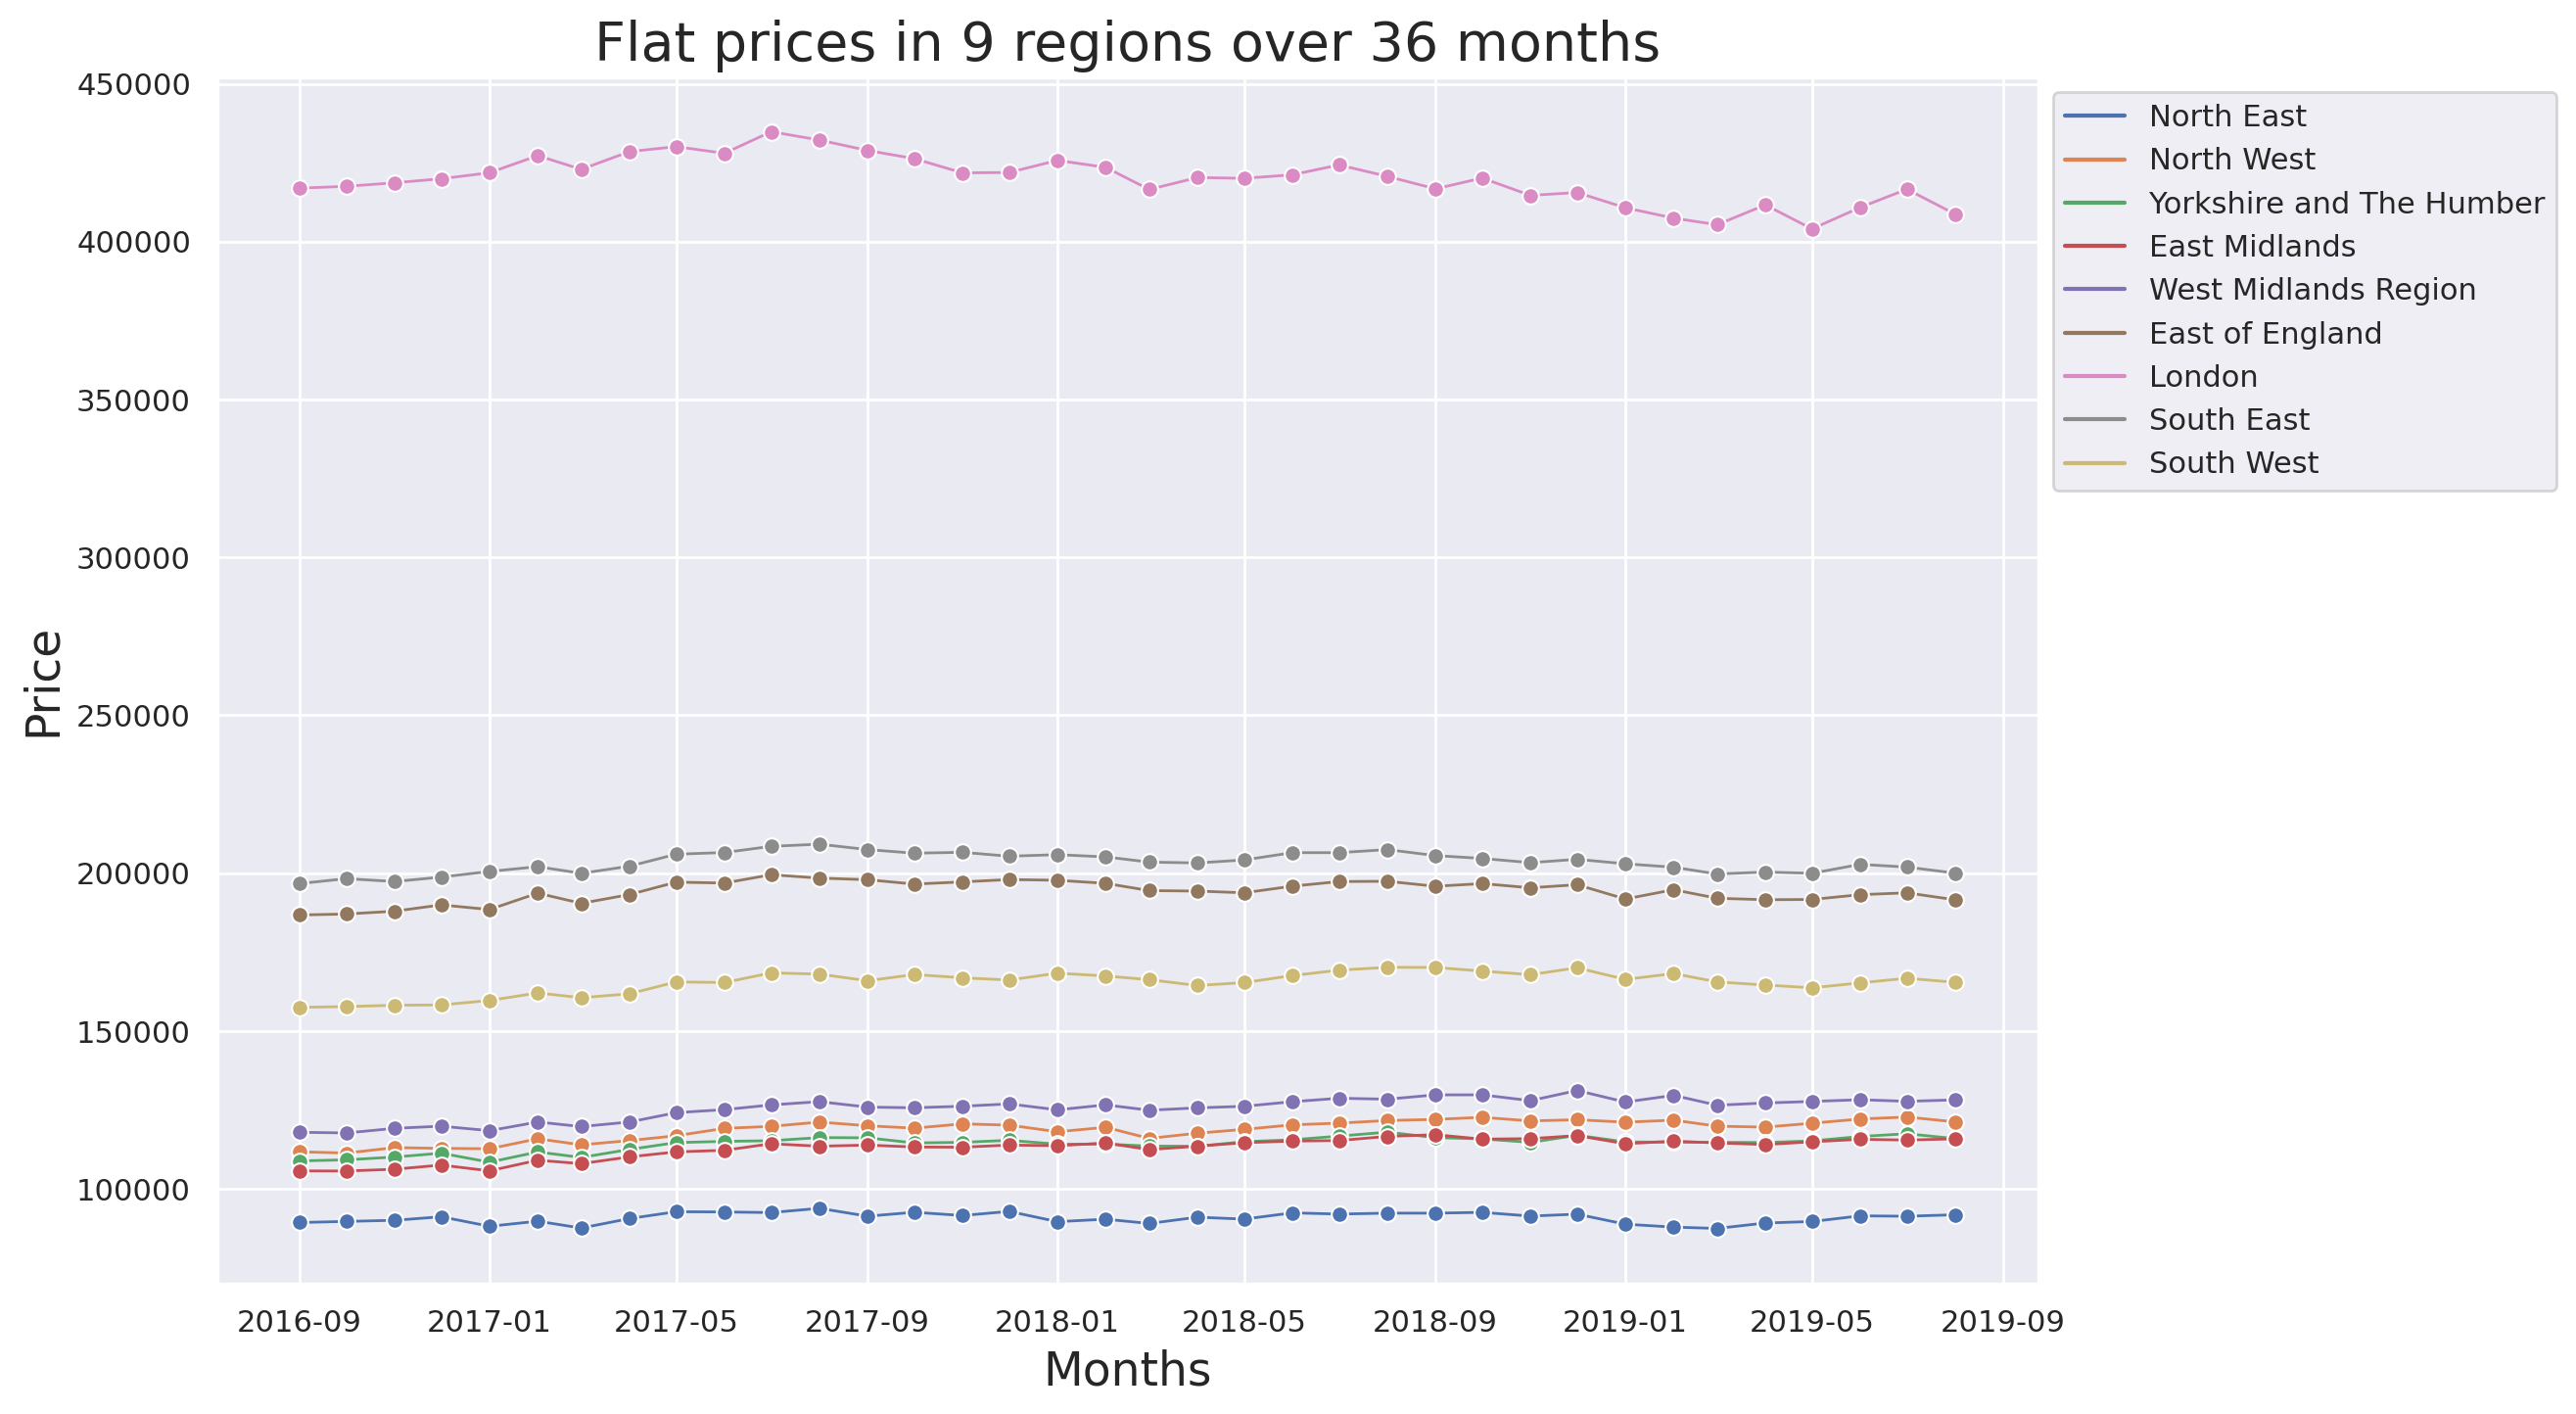

<Figure size 1000x1200 with 0 Axes>

In [263]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,8)})

sns.lineplot(data=Region, x ='Month', y = 'Flat',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Flat prices in 9 regions over 36 months', 
          fontsize = 20)
plt.ylabel('Price',fontsize = 17)
plt.xlabel('Months', fontsize = 17)
plt.figure(figsize = (10,12))
plt.show();

<font color='blue'> Comment : </font>

The graph illustrates trends in the price of flats between 2016-09 and around 2019-09 in 9 regions.

Overall, there are nothing special changes visually in 9 regions except 'London'. In the London region, the price of flats increased until around 2017-06 then steadily declined until 2019-08. Moreover, the price of flats increased in all regions except London. 

We can see that London has the highest price range. In contrast, North East region has the lowest price range of flats. However, we can't see detailed trends in this line graph because the price of flats in some regions is much higher than in other regions.

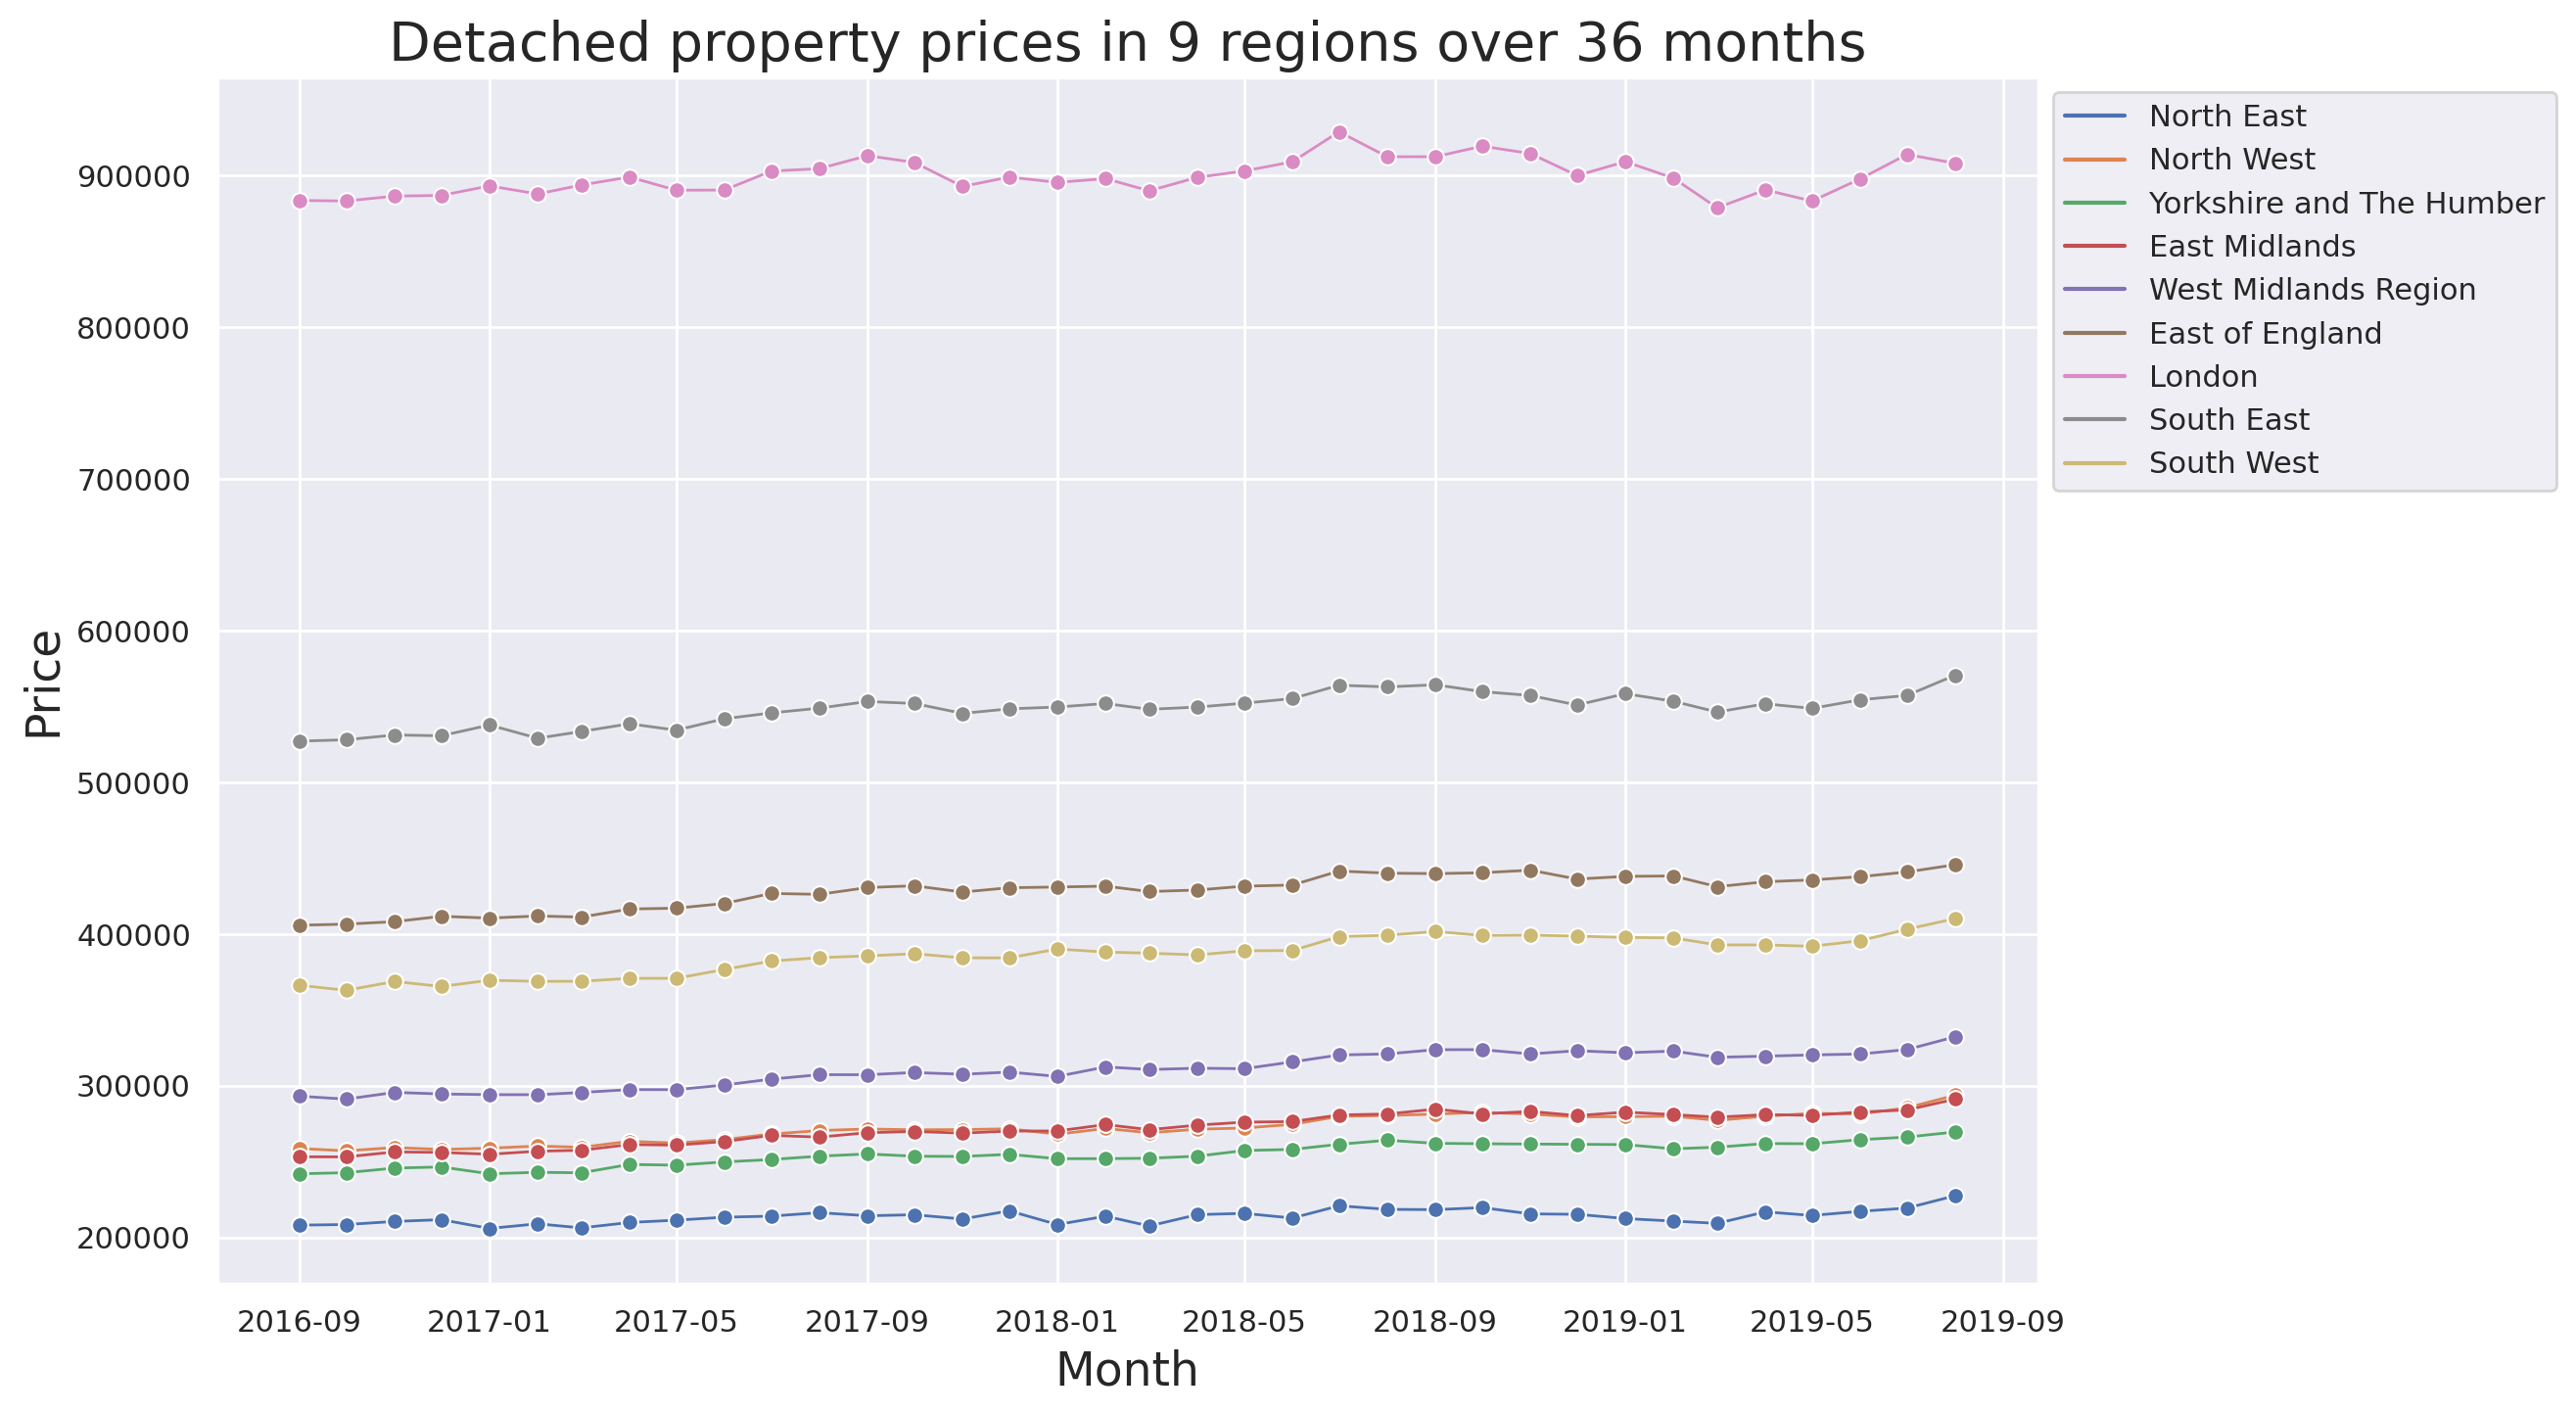

In [264]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(data=Region, x ='Month', y = 'Detached',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Detached property prices in 9 regions over 36 months',
         fontsize = 20)
plt.ylabel('Price', fontsize = 17)
plt.xlabel('Month',fontsize = 17);

<font color='blue'> Comment : </font>

The graph illustrates trends in the price of detached properties between 2016-09 and around 2019-09 in 9 regions.

Overall, there are nothing special changes visually in 9 regions except 'London'. In the London region, the price of detached properties has increased except having the lowest prices in around 2019-05. Moreover, the price of detached properties increased in all regions except London. 

We can see that London has the highest price range. In contrast, North East region has the lowest price range. However, we can't see detailed trends in this line graph because the price of a detached property in some regions is much higher than in other regions.

Finally, it is clear that detached properties are more expensive than flat properties based on the two graphs shown above.

### 3.2 Comparing trends in regions
Since we can't examine detailed trends, regions will be divided into 3 groups based on price range and graphs above. In such a way that, we can compare trends and see trends at different times of the year in all regions.

* Regions are divided into 3 groups such as 'cheaper', 'mid', and 'highest'. 3 groups are visualized and compared.
* x-axis shows months and y-axis shows prices
* Regions are shown in a legend box with different colors
* <font color='red'> cheaper </font> is regions that have lower prices in both flat and detached properties. Regions including 'East Midlands', 'North East','North West' and 'Yorkshire and The Humber'.
* <font color='red'> mid </font> is regions that have mid prices in both flat and detached properties. Regions including 'West Midlands', 'East of England','South West' and 'South East
* <font color='red'> higher </font> is regions that have higher prices in both flat and detached properties. Regions including 'London' and 'South East

London has much higher prices for flat and detached properties than any other region. So South East is also added to the higher price group for comparing trends.

In [265]:
#Assigning to groups
cheaper = Region.loc[((Region.Area == 'East Midlands') | (Region.Area == 'North East') |
                       (Region.Area == 'North West') | (Region.Area == 'Yorkshire and The Humber'))]

mid = Region.loc[(Region.Area == 'West Midlands Region') | (Region.Area == 'East of England') |
                       (Region.Area == 'South West')| (Region.Area == 'South East')]

higher = Region.loc[(Region.Area == 'London') | (Region.Area == 'South East')]

Text(0, 0.5, 'Price')

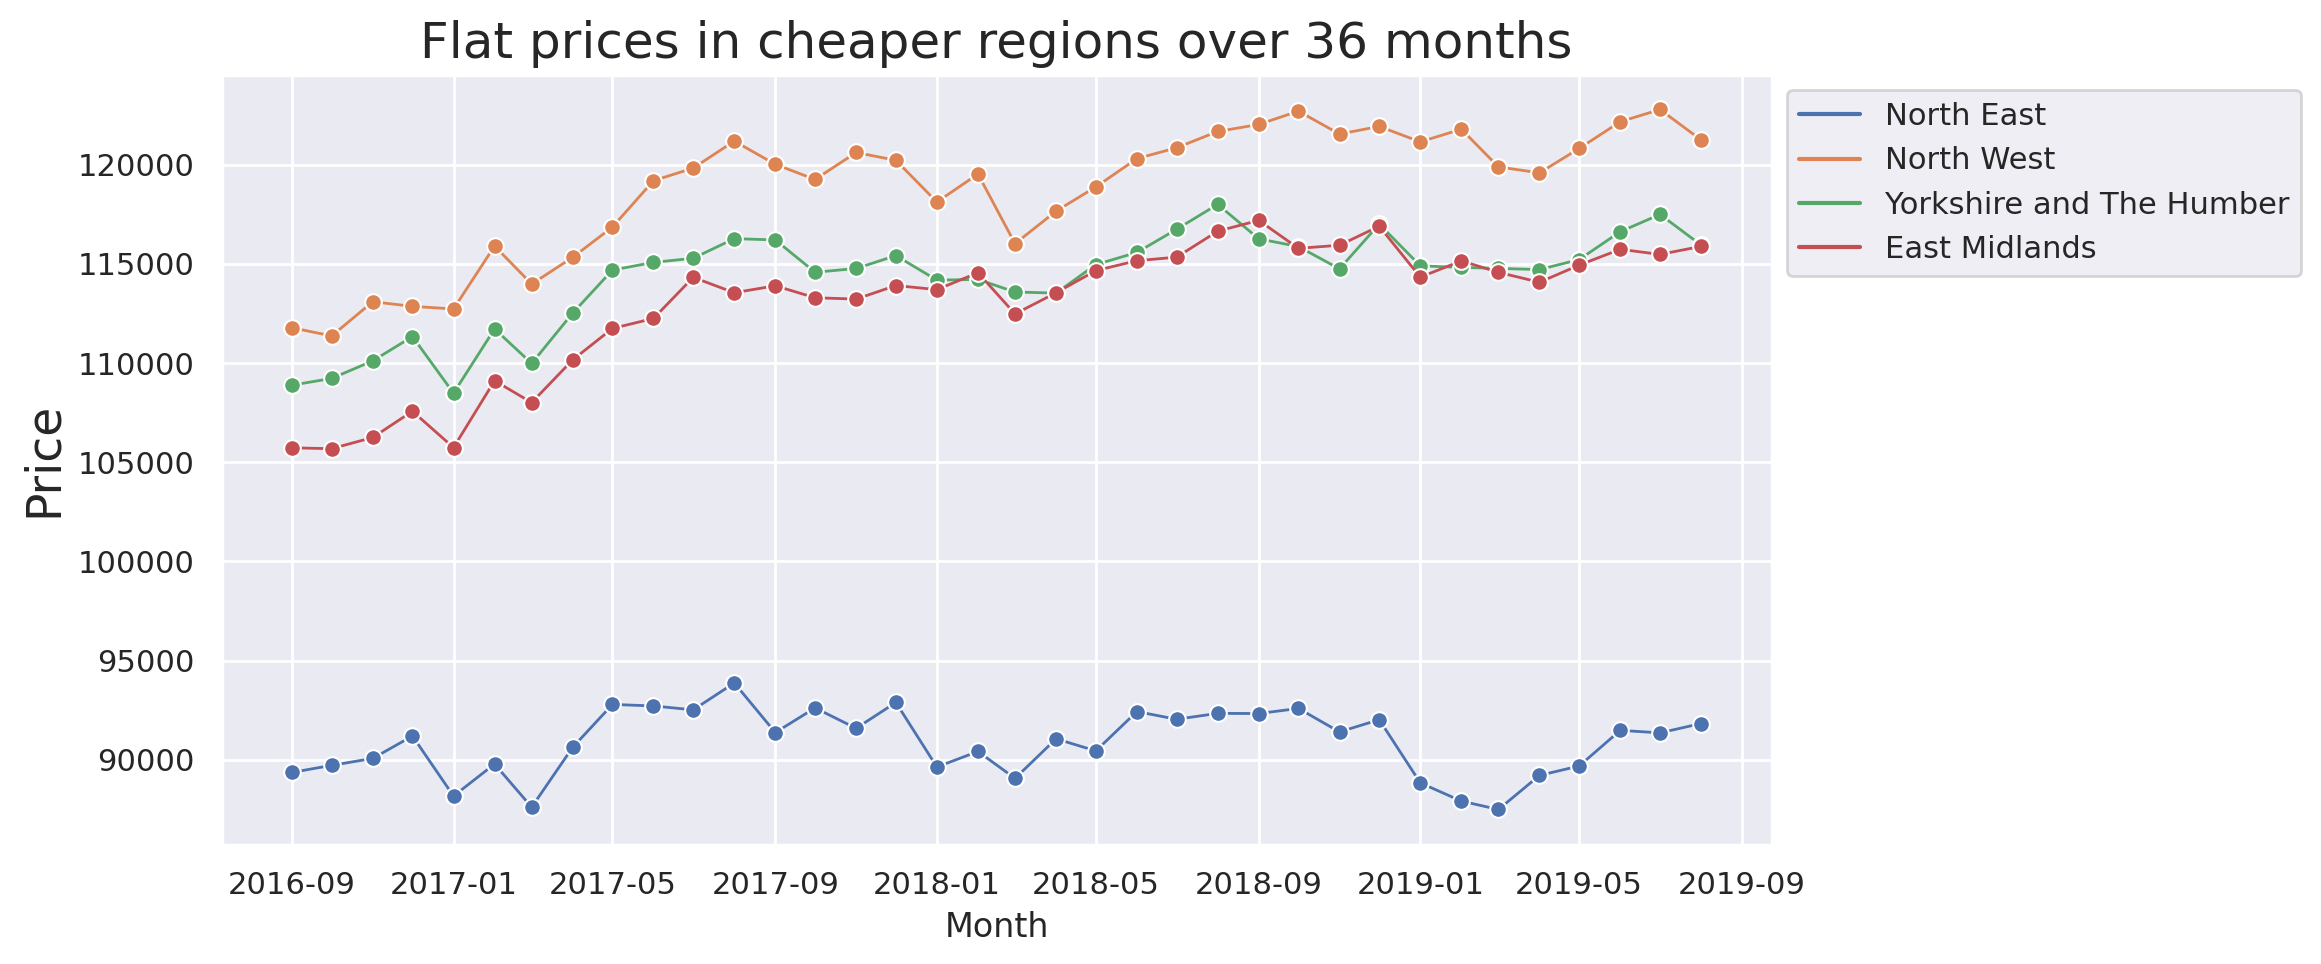

In [266]:
sns.set(rc={'figure.figsize':(10,5)})

sns.lineplot(data = cheaper, x ='Month', y = 'Flat',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Flat prices in cheaper regions over 36 months', 
          fontsize = 18)
plt.ylabel('Price',fontsize = 17)

<font color='blue'> Comment : </font>

The graph illustrates trends in the price of flats between 2016-09 and around 2019-09. It presents 4 different regions.

Overall, flat prices in all regions increased comparing 2016-09 to 2019-08 except for having a few falls. North West has the highest flat price in contrast to North East which is having lowest flat price.
* There are 2 drastic falls around 2018-12 and 2016-12 for the North East region. Peak price was the highest between 2017-05 and 2017-08. Compared to other regions, the Flat price gap is huge about 10000 in general
* In East Midlands and Yorkshire region, Flat prices increased drastically about 2000 compared to the beginning price.
* Similarly, in the North West Region, the flat prices steadily increased by about 10000 except having drastic fall in 2018-03.

Text(0, 0.5, 'Price')

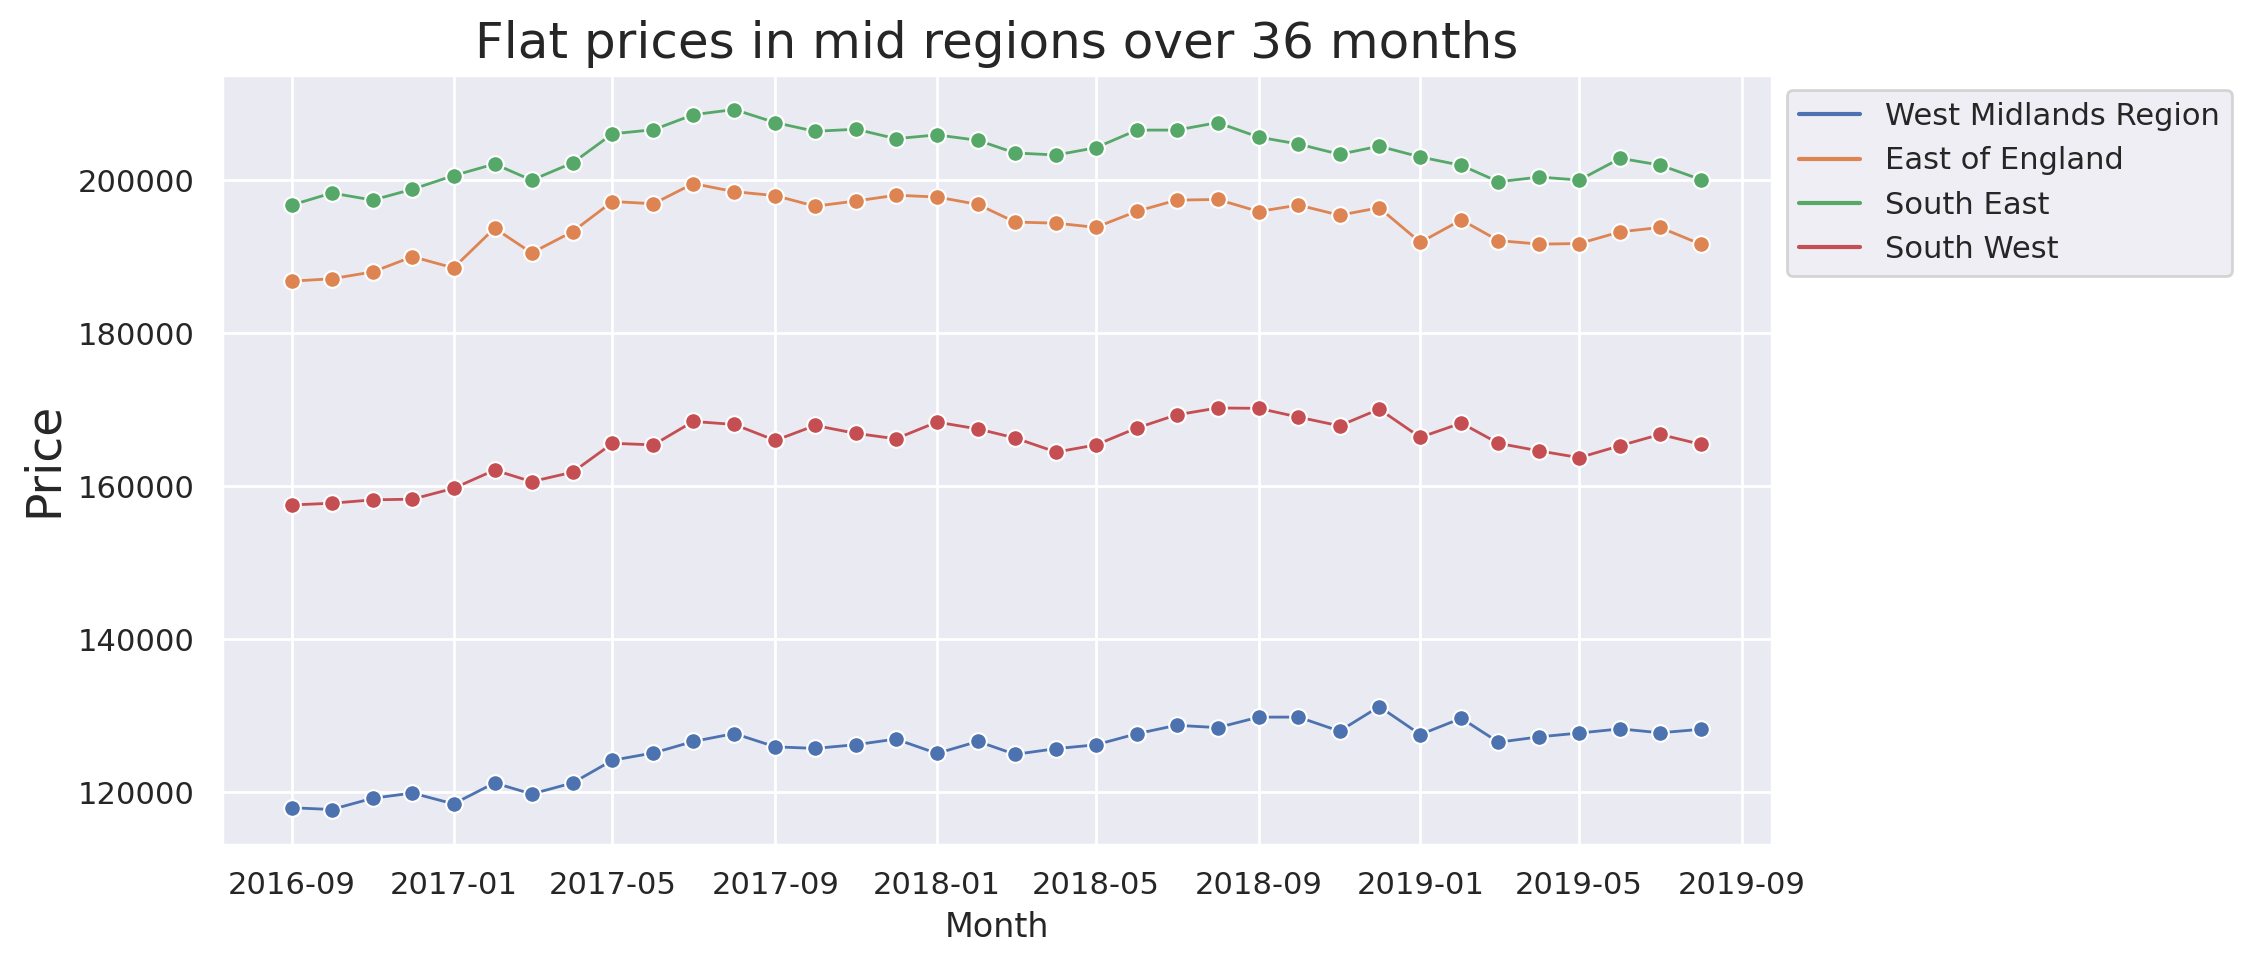

In [267]:
sns.set(rc={'figure.figsize':(10,5)})

sns.lineplot(data = mid, x ='Month', y = 'Flat',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Flat prices in mid regions over 36 months', 
          fontsize = 18)
plt.ylabel('Price',fontsize = 17)

<font color='blue'> Comment : </font>

The graph illustrates trends in the price of flats between 2016-09 and around 2019-09. It presents 4 different regions.

Overall, flat prices in all regions increased comparing 2016-09 to 2019-08 except for having a few falls. South East has the highest flat price in contrast to the West Midlands region which has the lowest flat price.
* East of England, South West, and West Midlands regions steadily increased over months. 
* In 2019-01, Flat prices decreased in all regions.

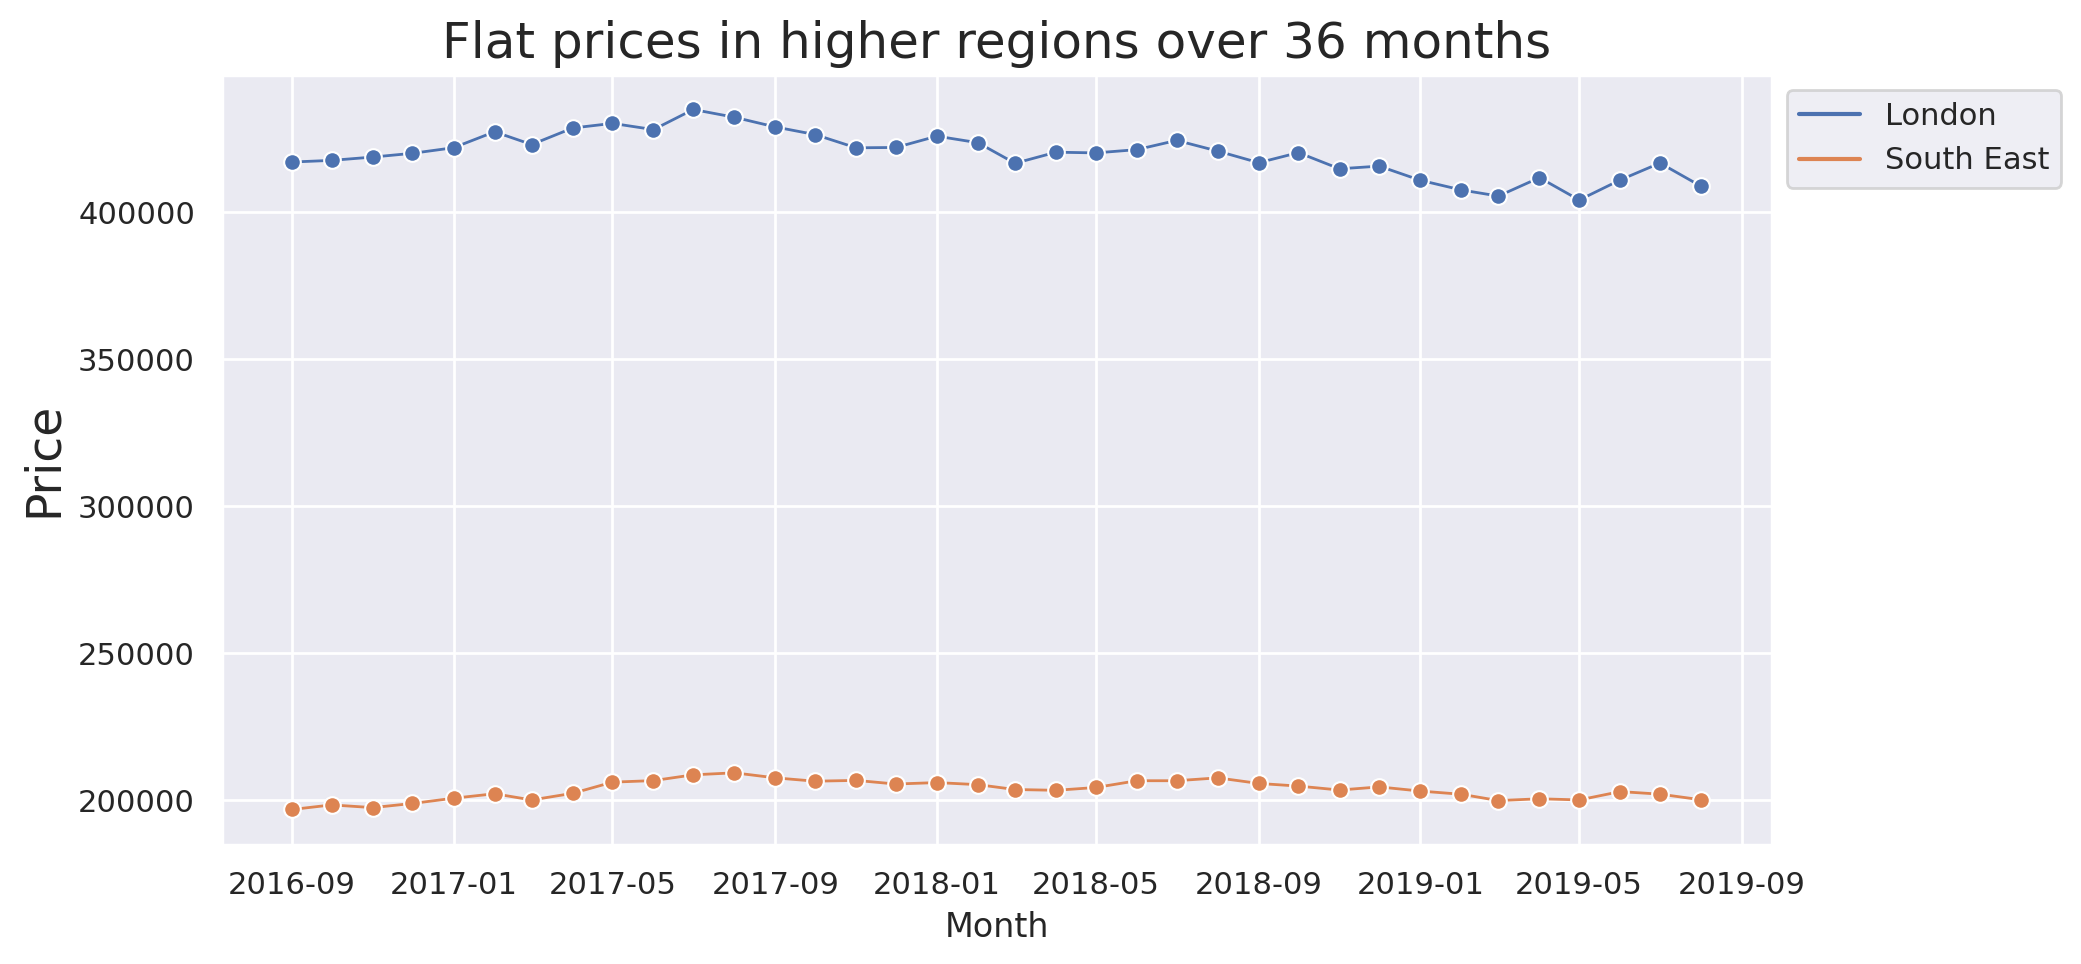

In [268]:
sns.set(rc={'figure.figsize':(10,5)})

sns.lineplot(data = higher, x ='Month', y = 'Flat',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o');
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Flat prices in higher regions over 36 months', 
          fontsize = 18)
plt.ylabel('Price',fontsize = 17);

<font color='blue'> Comment : </font>

The graph illustrates trends in the price of flats between 2016-09 and around 2019-09 in 2 regions.

Overall, there are nothing special changes visually in the 2 regions. In the London region, the price of flats increased until around 2017-06 then steadily declined until 2019-08. Comparing South East and London, the flat price gap is huge about 200000.

Text(0, 0.5, 'Price')

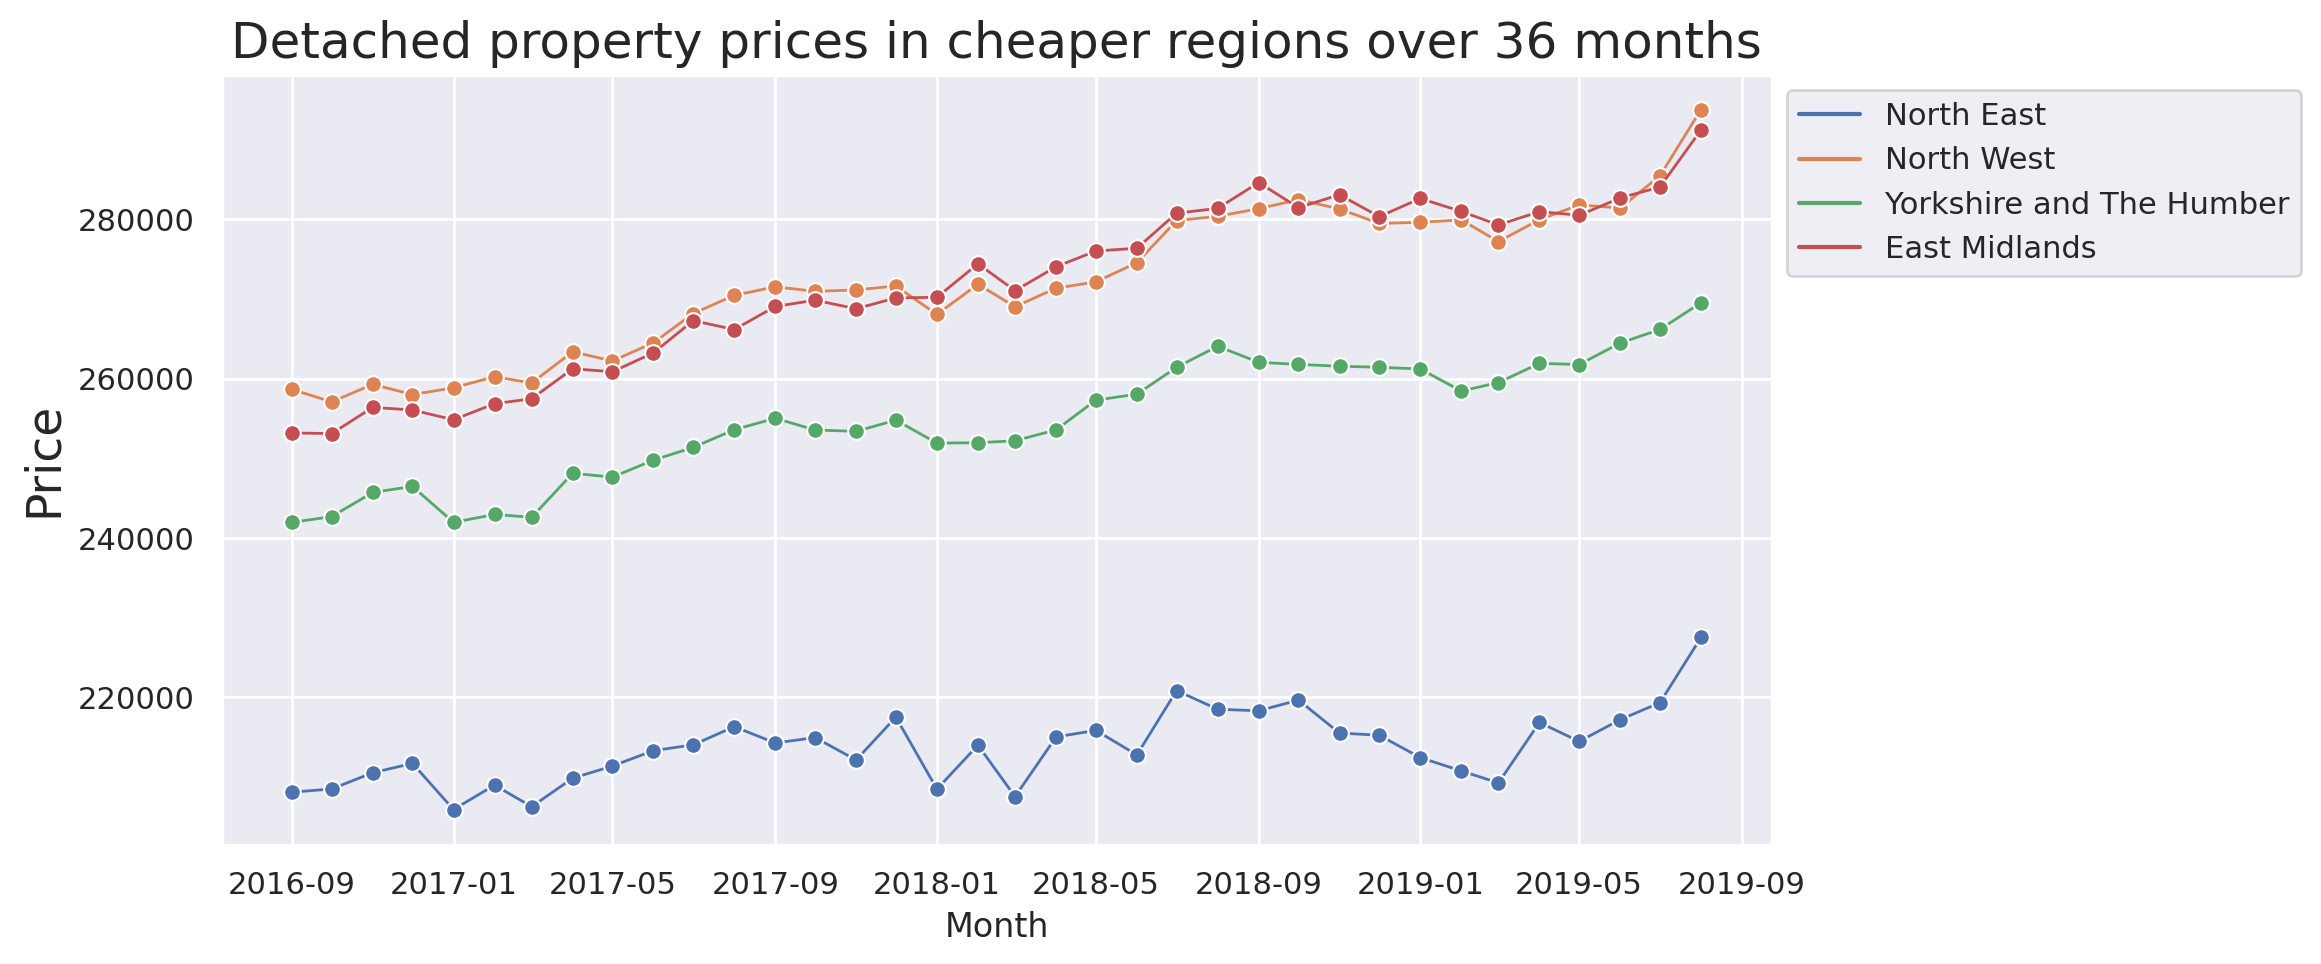

In [269]:
sns.set(rc={'figure.figsize':(10,5)})

sns.lineplot(data = cheaper, x ='Month', y = 'Detached',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Detached property prices in cheaper regions over 36 months',
         fontsize = 18)
plt.ylabel('Price', fontsize = 17)



<font color='blue'> Comment : </font>

The graph illustrates trends in the price of detached property between 2016-09 and around 2019-09. It presents 4 different regions.

Overall, detached property prices in all regions increased comparing 2016-09 to 2019-08 except for having a few falls. East Midlands has the highest detached property price in contrast to North East which is having lowest detached property price.
* In East Midlands, North West, and Yorkshire region, prices are increased by about 20000 compared to the beginning price.
* Similarly, in the North East Region, the flat price steadily increased by about 10000 except having drastic fall in 2018-03.

Text(0, 0.5, 'Price')

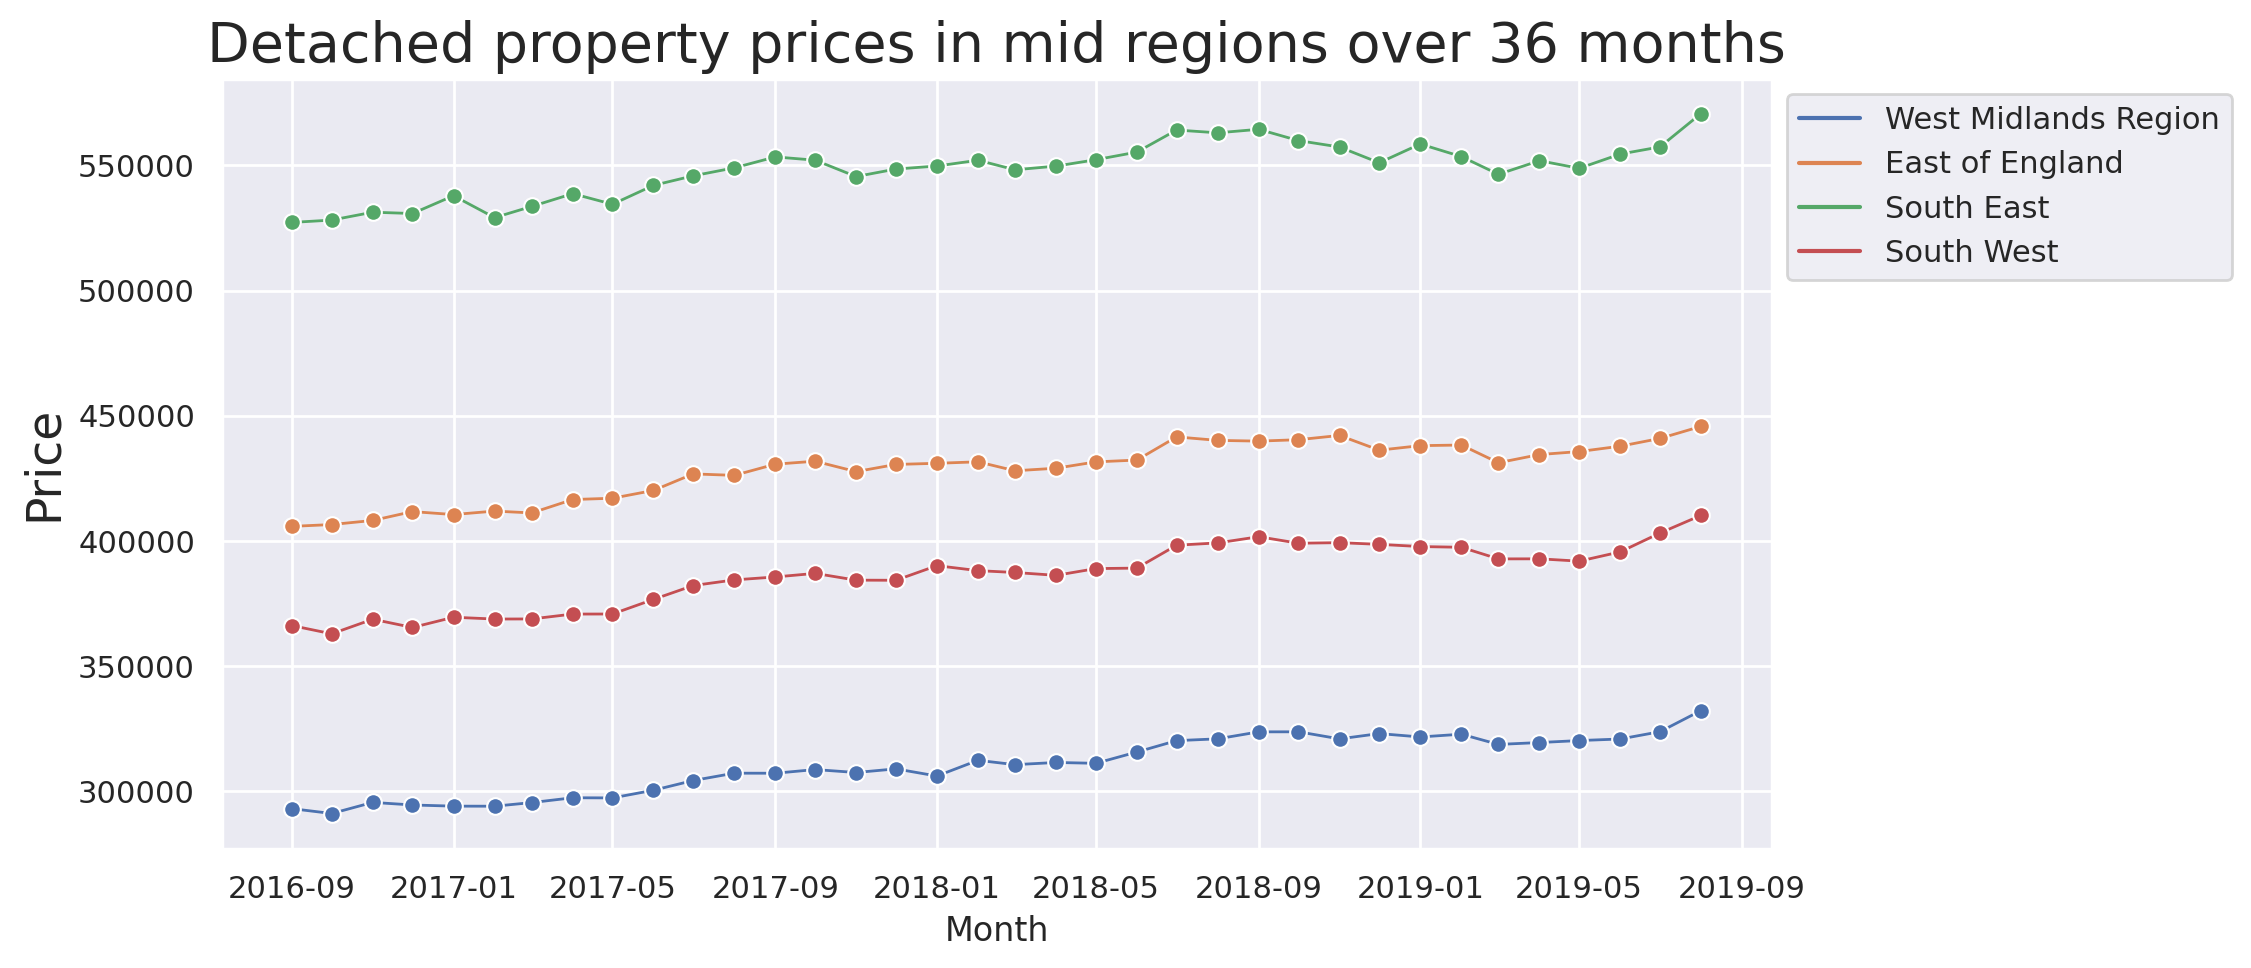

In [270]:
sns.set(rc={'figure.figsize':(10,5)})

sns.lineplot(data = mid, x ='Month', y = 'Detached',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Detached property prices in mid regions over 36 months',
         fontsize = 20)
plt.ylabel('Price', fontsize = 17)

<font color='blue'> Comment : </font>

The graph illustrates trends in the price of detached between 2016-09 and around 2019-09. It presents 4 different regions.

Overall, detached prices in all regions increased comparing 2016-09 to 2019-08. South East has the highest detached price in contrast to West Midlands region which is having the lowest price.
* Price in all regions steadily increased over months. 


Text(0, 0.5, 'Price')

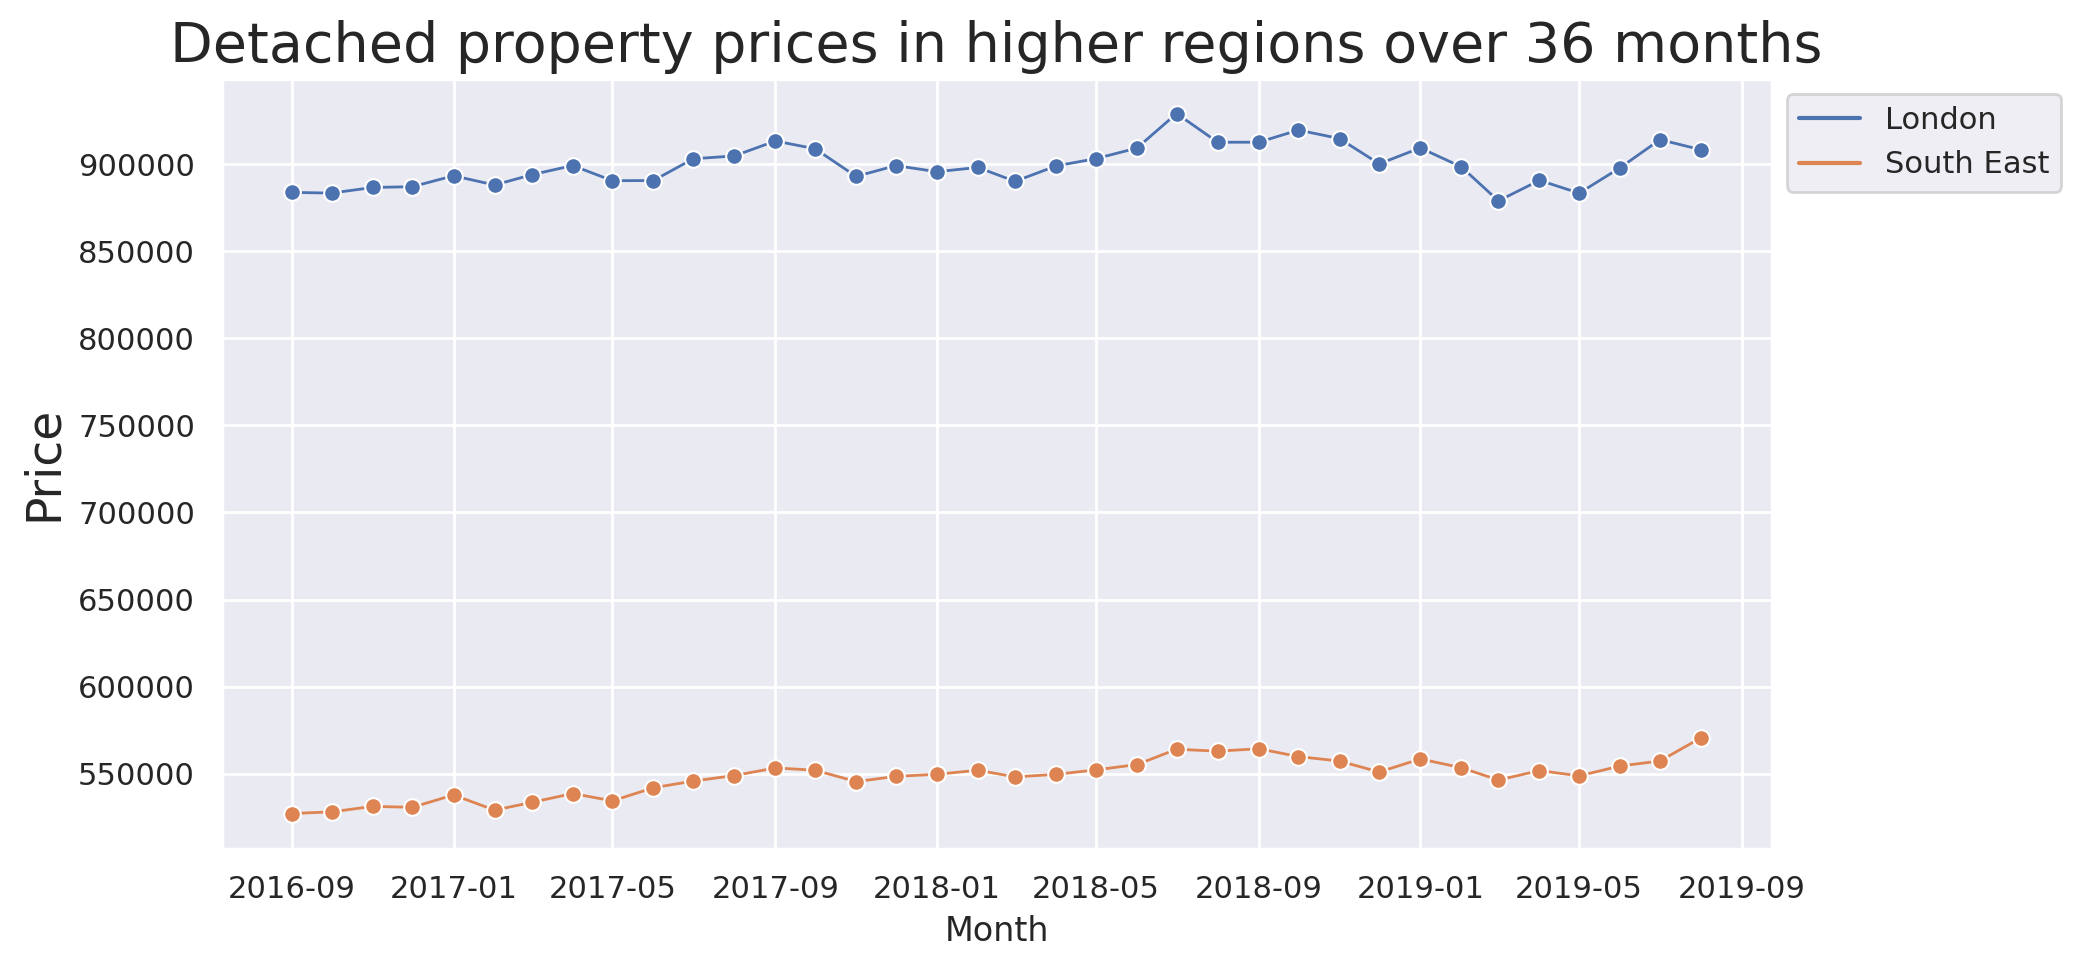

In [271]:
sns.set(rc={'figure.figsize':(10,5)})

sns.lineplot(data = higher, x ='Month', y = 'Detached',
                  hue='Area', palette='deep',
                  legend='full', lw=1, marker = 'o')
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Detached property prices in higher regions over 36 months',
         fontsize = 20)
plt.ylabel('Price', fontsize = 17)

<font color='blue'> Comment : </font>

Overall, there are nothing special changes visually. In the London region, the price of detached properties has increased except having the lowest prices in around 2019-05. On the other hand, Prices in South East region increased steadily.

#### 3.3 Comparing price range of two properties
Prices range of two properties are compared using lineplot and barchart.

* x-axis shows regions and y axis shows prices


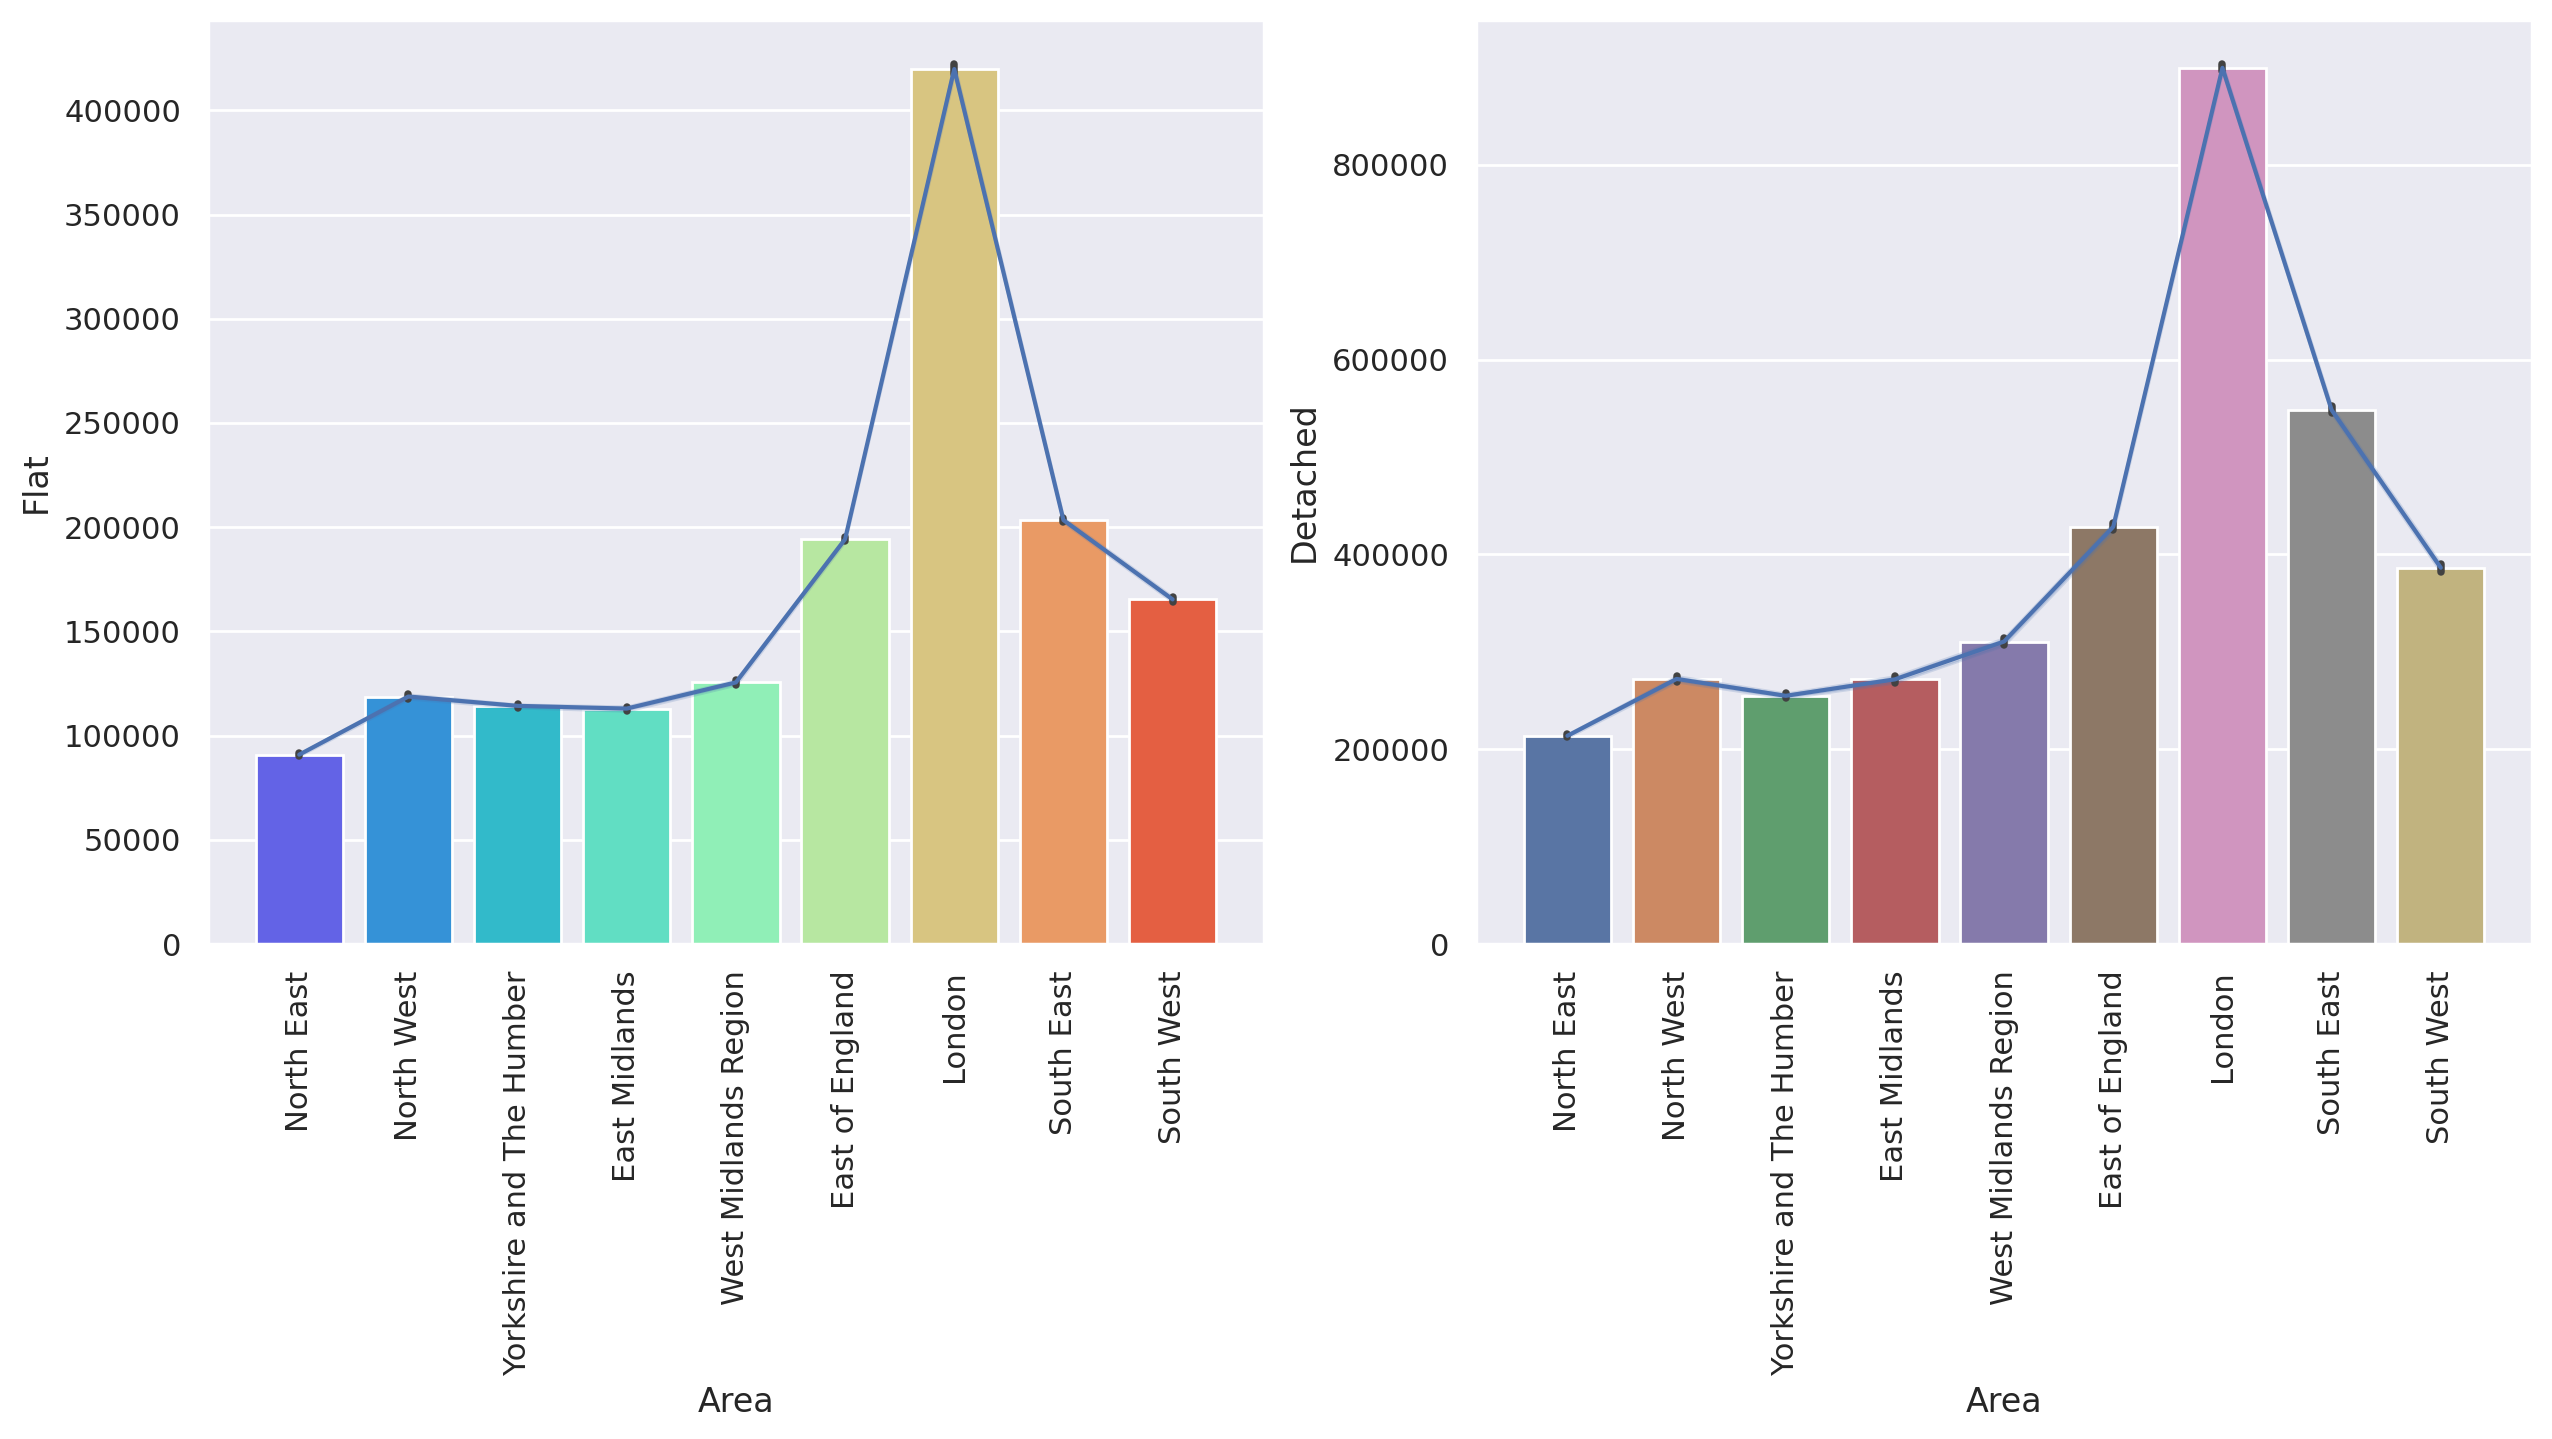

In [272]:
fig, (a1, a2) = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data = Region, x = 'Area', y = 'Flat', palette = 'rainbow', ax = a1)
sns.barplot(data = Region, x = 'Area', y = 'Detached',palette = 'deep', ax = a2)
sns.lineplot(data = Region, x = 'Area', y = 'Flat', palette = 'rainbow', ax = a1)
sns.lineplot(data = Region, x = 'Area', y = 'Detached',palette = 'deep', ax = a2)
a1.tick_params(axis='x', rotation=90)
a2.tick_params(axis='x', rotation=90)

<font color='blue'> Comment : </font>

Overall, Detached properties are much more expensive than flat property as almost doubling the prices in all regions.

## Section 4. Flat price changes

The change in the price of flats in each area between July 2017 and July 2018 is calculated and visualized using barchart and lineplot.
#### 4.1 Calculating price change of flat in each area between July 2017 and July 2018
* Locating price of flats in each area between July 2017 and July 2018
* <font color='red'> Year_changes  </font> is data of price of flats in each area between July 2017 and July 2018
* <font color='red'> Price_change  </font> is pivot table from <font color='red'> Year_changes  </font> data. Table columns are <font color='red'> Flat17  </font> and <font color='red'> Flat18  </font>, which are prices in each areas.
* From this <font color='red'> Price_change  </font> data, The change in the price of flats in each area between July 2017 and July 2018 is calculated and assigned to  <font color='red'> Price_change  </font>



In [273]:
#Locating data with 2017-07 and 2018-08
Year_changes = Area.loc[(Area.Month == '2017-07-01') | (Area.Month == '2018-07-01')]
Year_changes.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
10,Hartlepool,E06000001,186030.1497,112168.0127,79436.27053,65007.84170,2017-07-01,North East
22,Hartlepool,E06000001,180836.5829,108917.0807,76843.00978,61116.82158,2018-07-01,North East
46,Middlesbrough,E06000002,187695.9901,111107.0273,79505.65683,69163.06963,2017-07-01,North East
58,Middlesbrough,E06000002,195242.2776,114478.7800,81719.20818,69313.90788,2018-07-01,North East
82,Redcar and Cleveland,E06000003,187618.3790,117895.4611,89473.56935,65507.80990,2017-07-01,North East


In [274]:
#Pivot table from Year_changes
Price_change = Year_changes.pivot_table(values = ['Flat'], index = ['Area','RegionName'], columns = ['Month'])
#Assigning new column names in Price_change
Price_change.columns = ['Flat17', 'Flat18']
Price_change.head()

,,Flat17,Flat18
Area,RegionName,,
Barking and Dagenham,London,233026.92790,230318.11740
Barnet,London,403492.77130,393139.28910
Barnsley,Yorkshire and The Humber,73054.06885,75808.74698
Bath and North East Somerset,South West,242441.16080,247866.66800
Bedford,East of England,167562.35620,169497.10010


In [275]:
# Due to having two index, its better to reset index
Price_change = Price_change.reset_index()
# Calculating difference and assigning to data
Price_change = Price_change.assign(Changes = Price_change['Flat18'] - Price_change['Flat17'])
Price_change.head()

,Area,RegionName,Flat17,Flat18,Changes
0,Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050
1,Barnet,London,403492.77130,393139.28910,-10353.48220
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813
3,Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720
4,Bedford,East of England,167562.35620,169497.10010,1934.74390


<font color='blue'> Comment : </font>

From above, we can see that The change in the price of flats in each area between July 2017 and July 2018 is calculated and assigned to Price_change

#### 4.2 Flat price changes in regions

Flat price changes in 9 regions is visualized using bar chart, line plot and boxplot.
* y axis is price changes and x axis is regions.

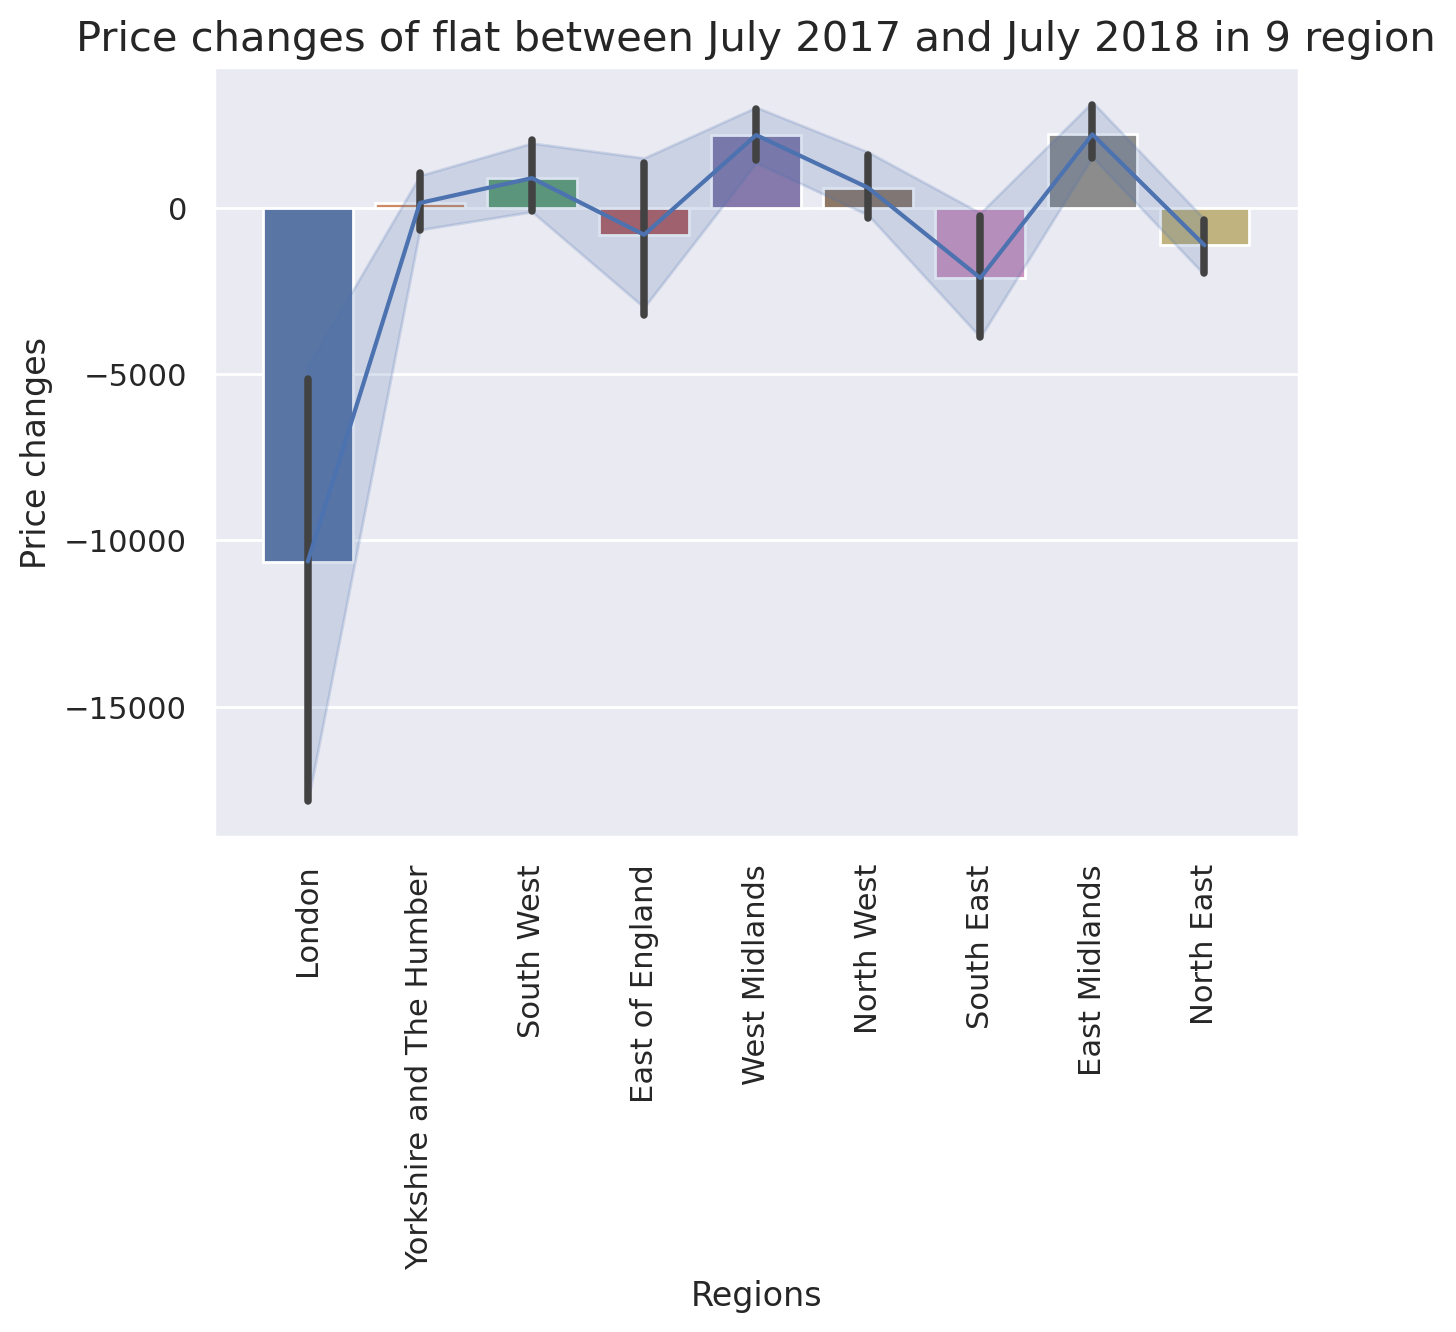

In [276]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = Price_change, x = 'RegionName' , y = 'Changes')
sns.lineplot(data = Price_change, x = 'RegionName', y = 'Changes')
plt.title('Price changes of flat between July 2017 and July 2018 in 9 region', fontsize = 15)
plt.xlabel('Regions', fontsize = 12)
plt.ylabel('Price changes', fontsize = 12)
plt.xticks(rotation = 90);

<font color='blue'> Comment : </font>

The chart shows the price change of flats in each area between July 2017 and July 2018 in 9 regions.

Overall, London has drastically declined between July 2017 and July 2018 about an average of -10000 with a maximum of -17000, compared to other regions. Similarly, East of England, South East, and North East declined but not in a high number of prices.
On the other hand, West and East Midlands increased by around +3000. There are small rises in Yorkshire, South West, and North West.

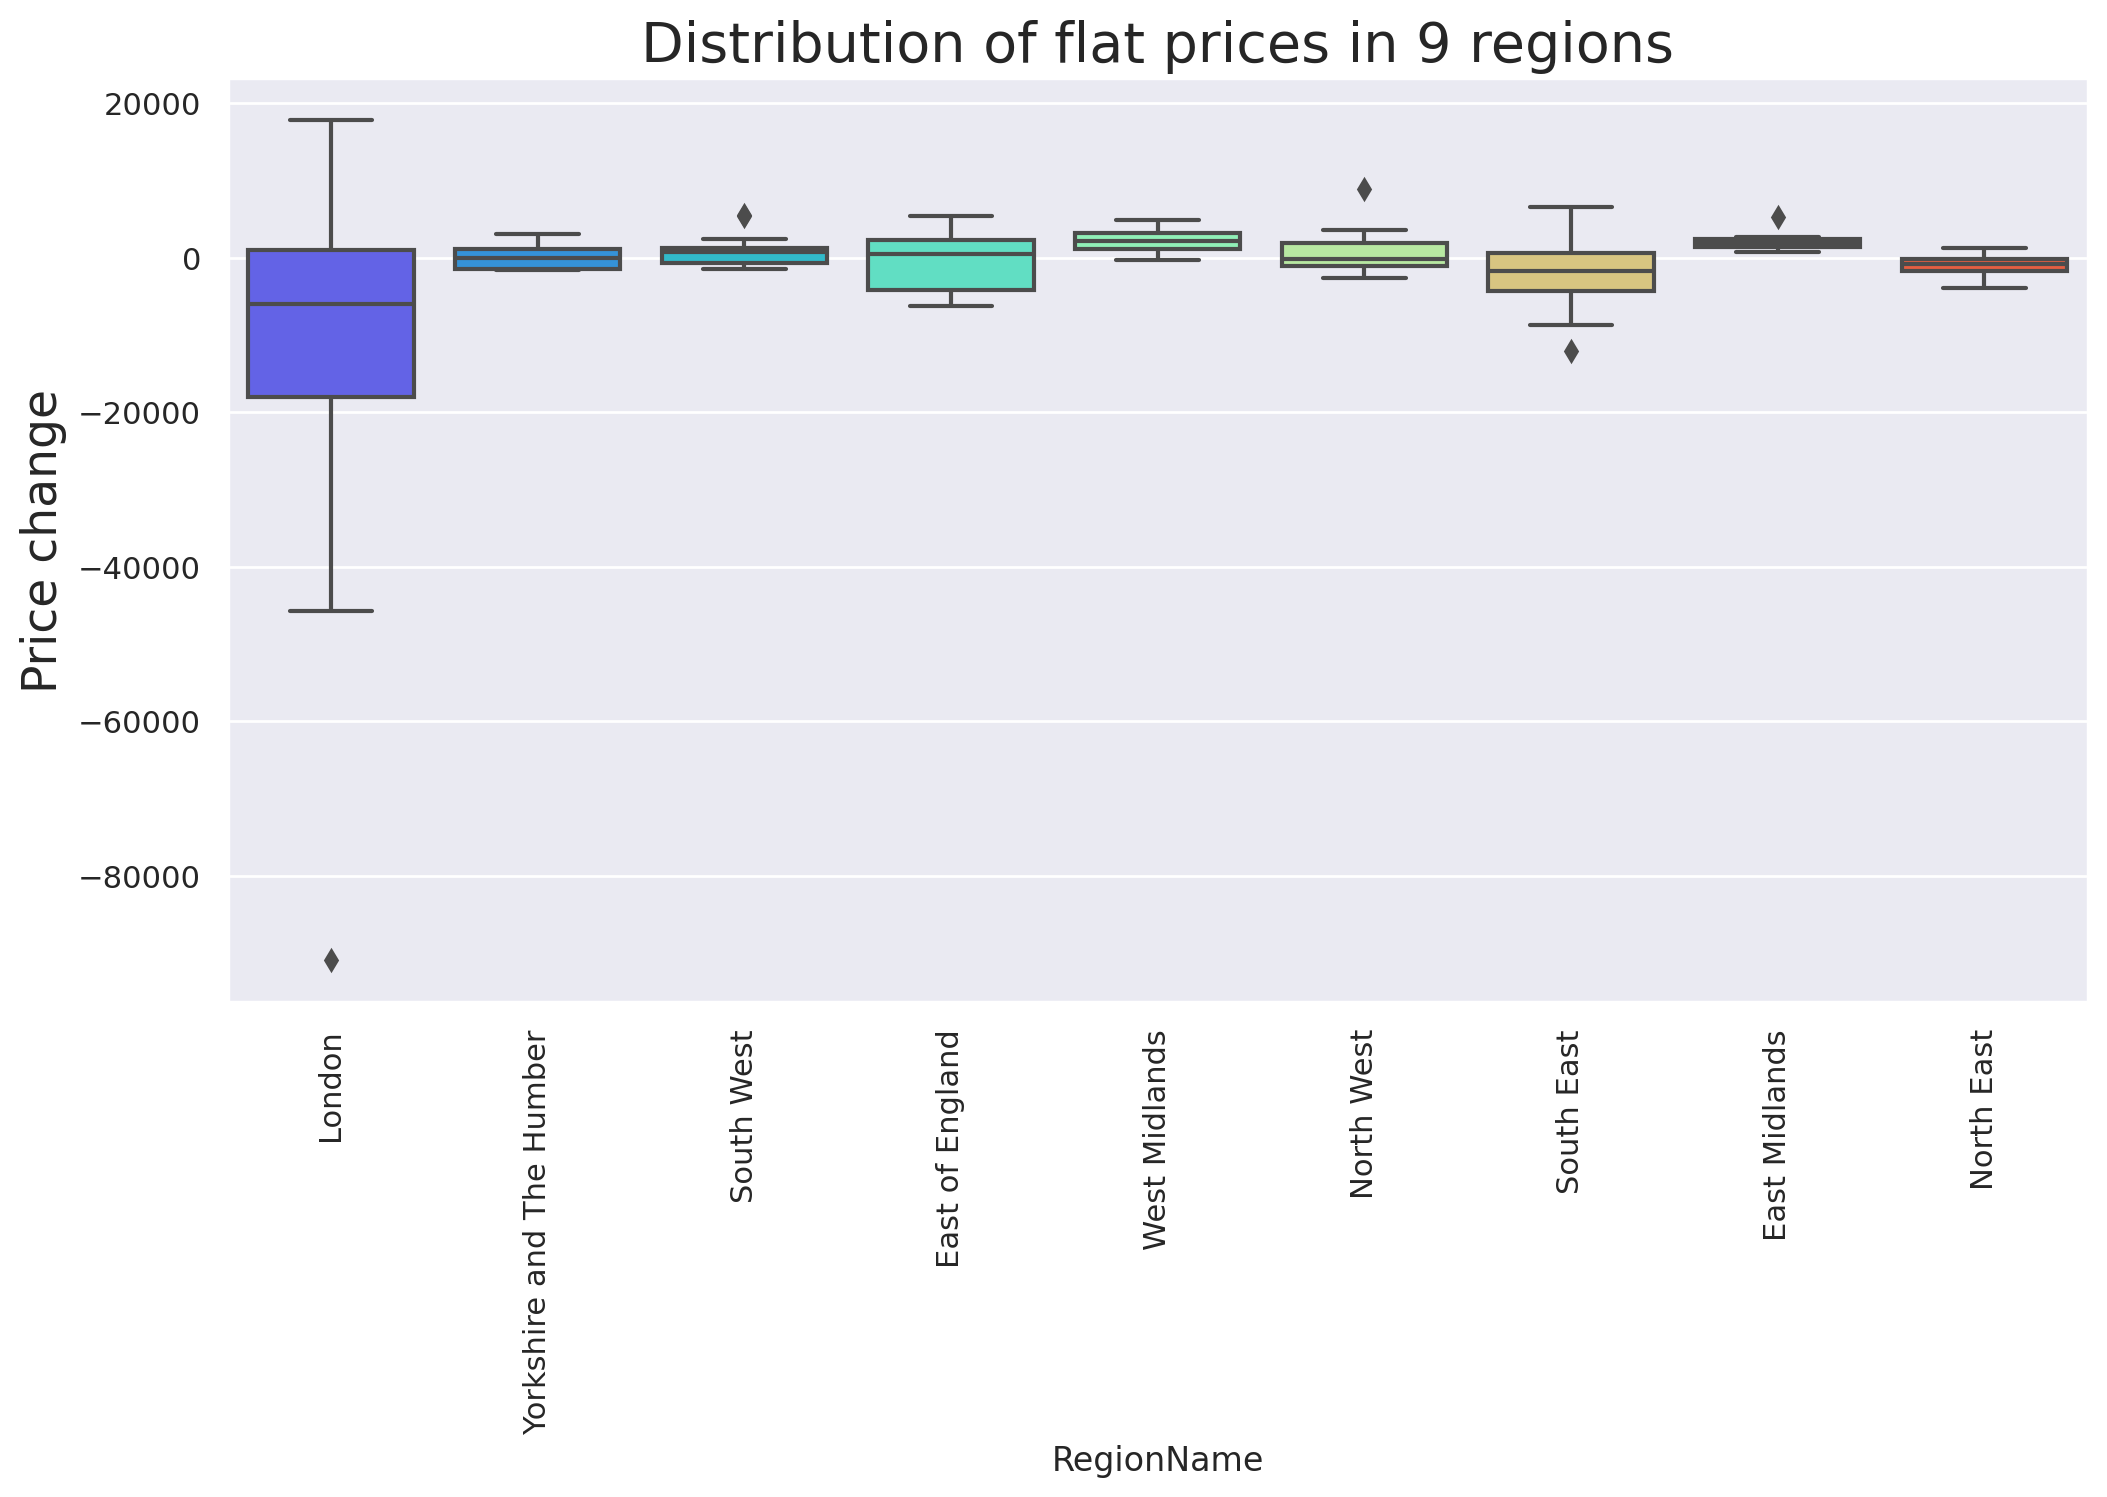

In [277]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(x = 'RegionName', y = 'Changes', data = Price_change, palette='rainbow')
plt.title('Distribution of flat prices in 9 regions',
         fontsize = 20)
plt.ylabel('Price change', fontsize = 17)
plt.xticks(rotation = 90);

<font color='blue'> Comment : </font>

The boxplot shows the distribution of the price changes of flats in each area between July 2017 and July 2018 in 9 regions.

Overall, London has the biggest price change with an average of around -10000 and the highest of over -80000 (outlier). In contrast, Yorkshire, South West, East England, and North West have price changes with an average of around 0.

#### 4.3 Flat price changes in areas

Flat price changes in all areas are visualized using bar chart.
* y axis is price changes and x axis is areas.

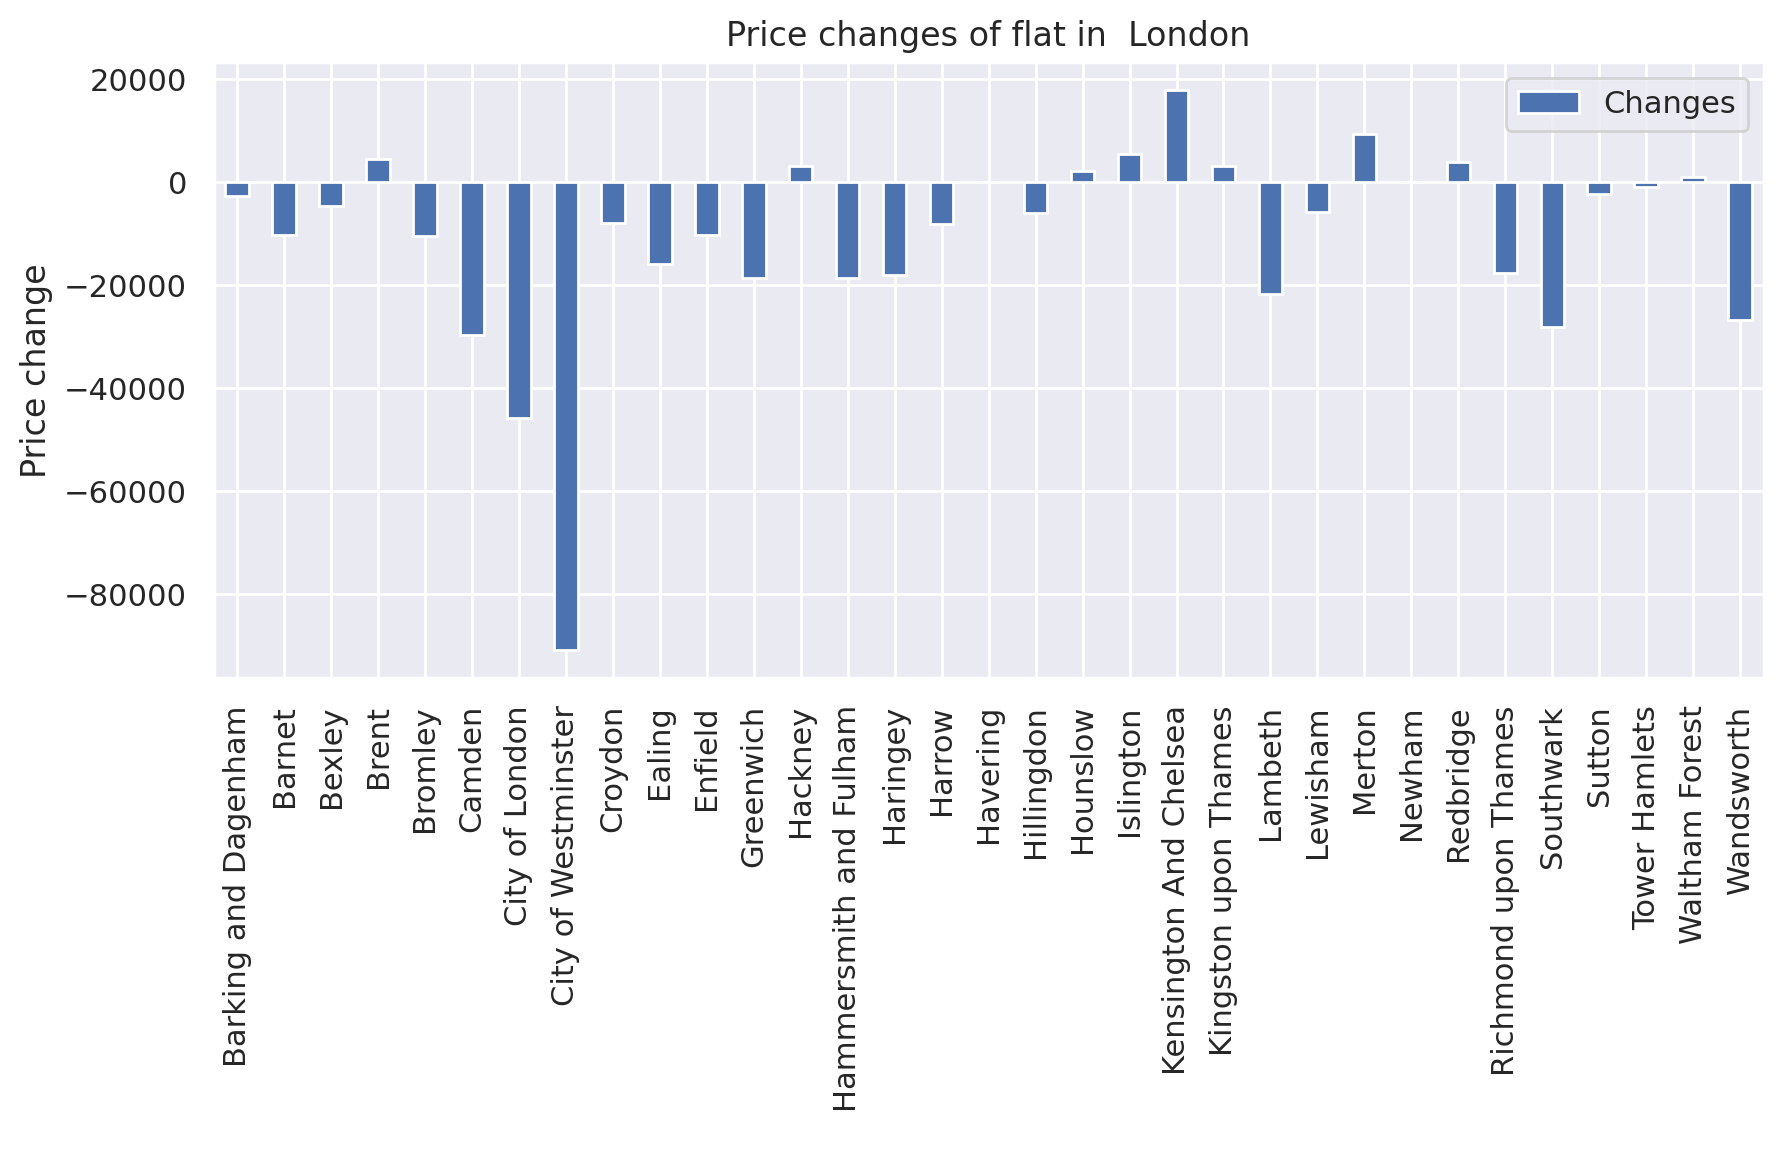

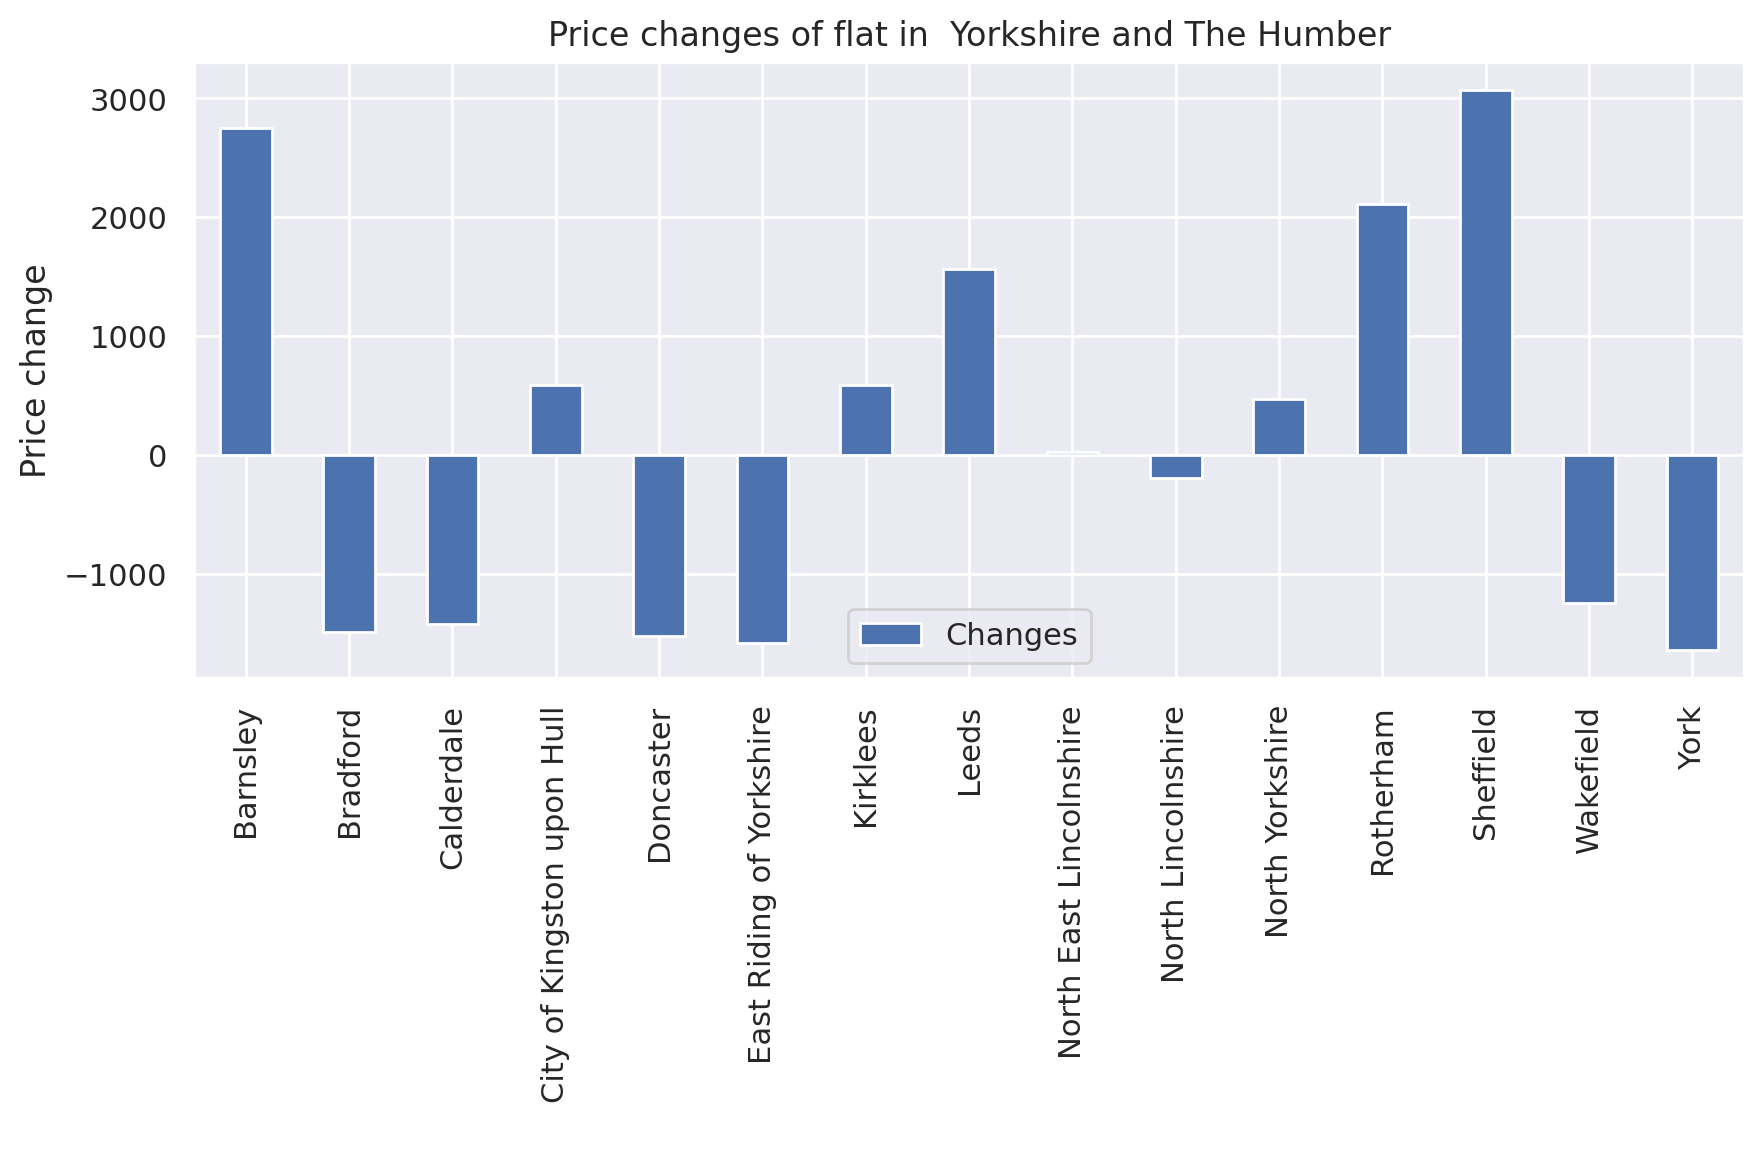

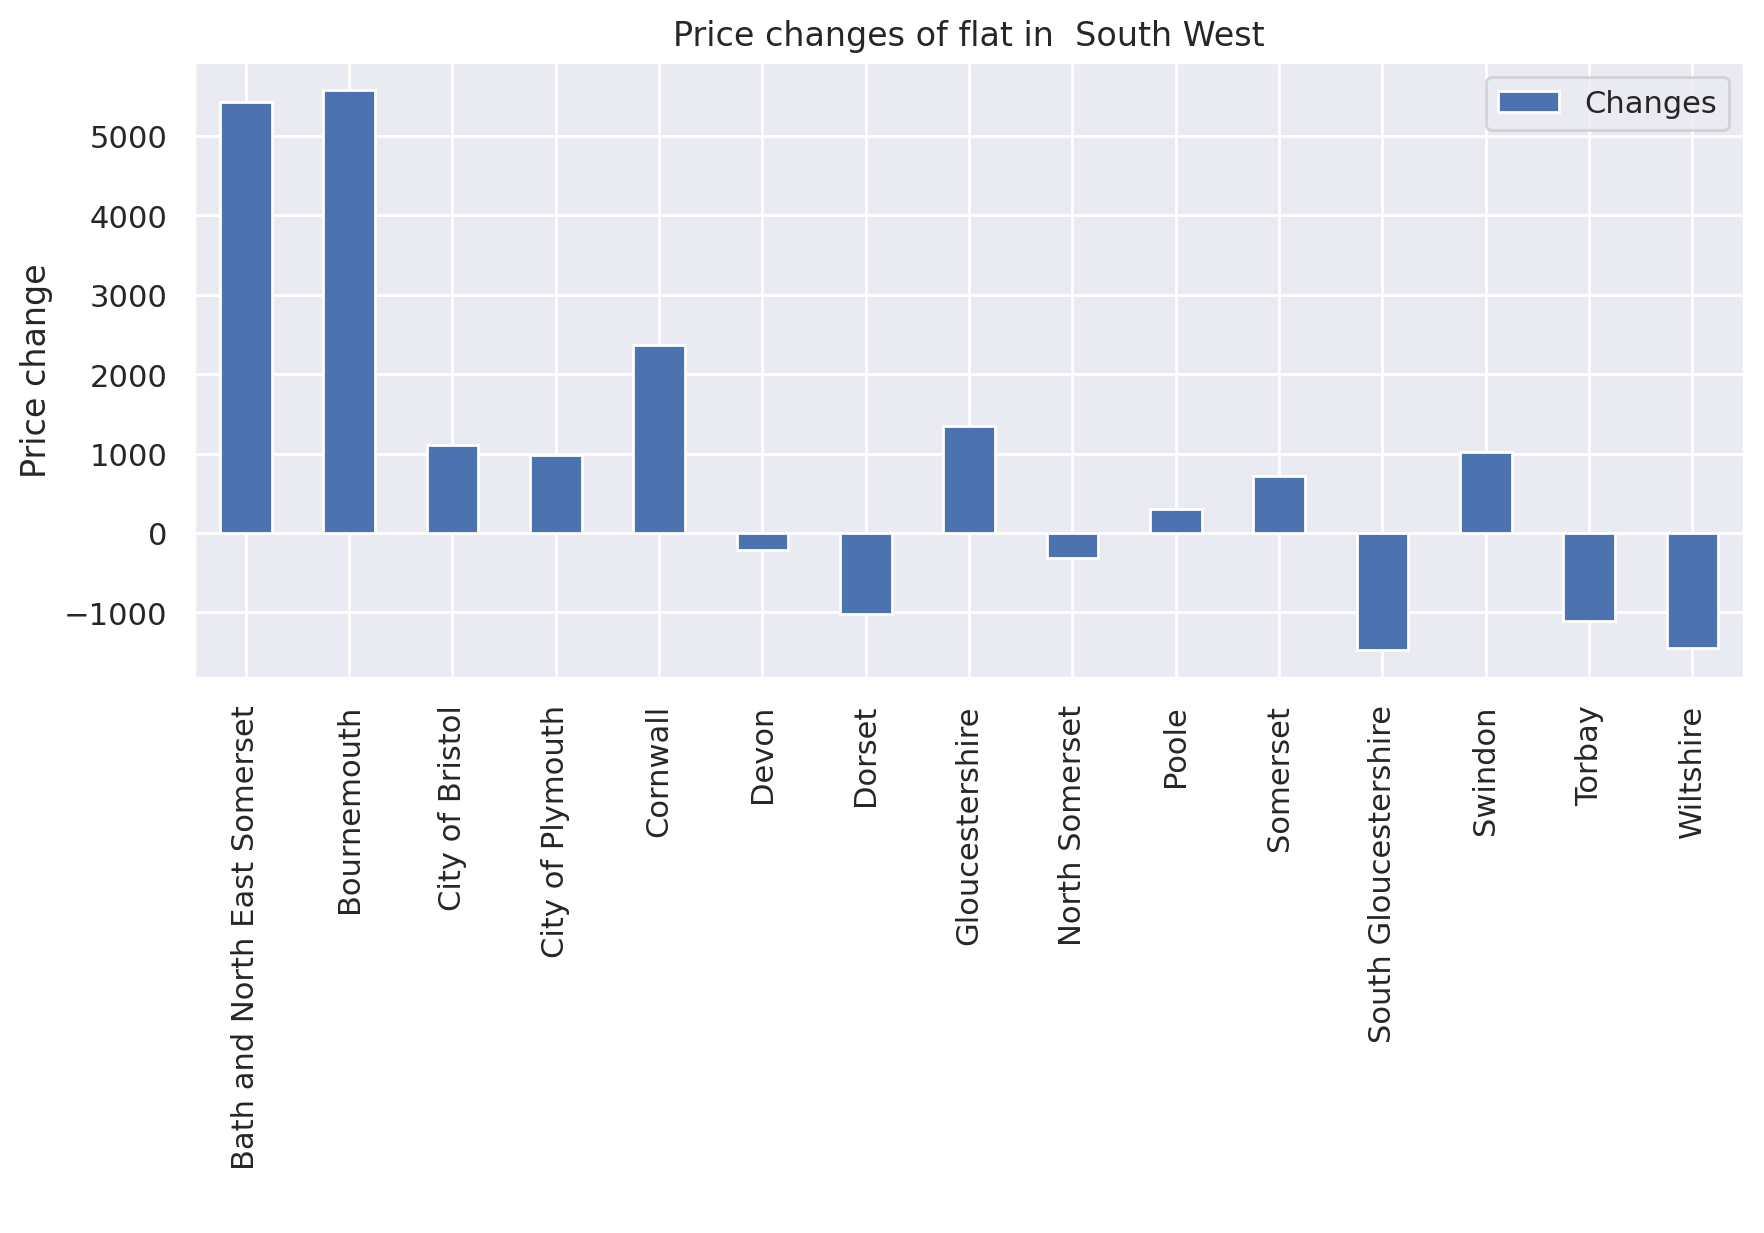

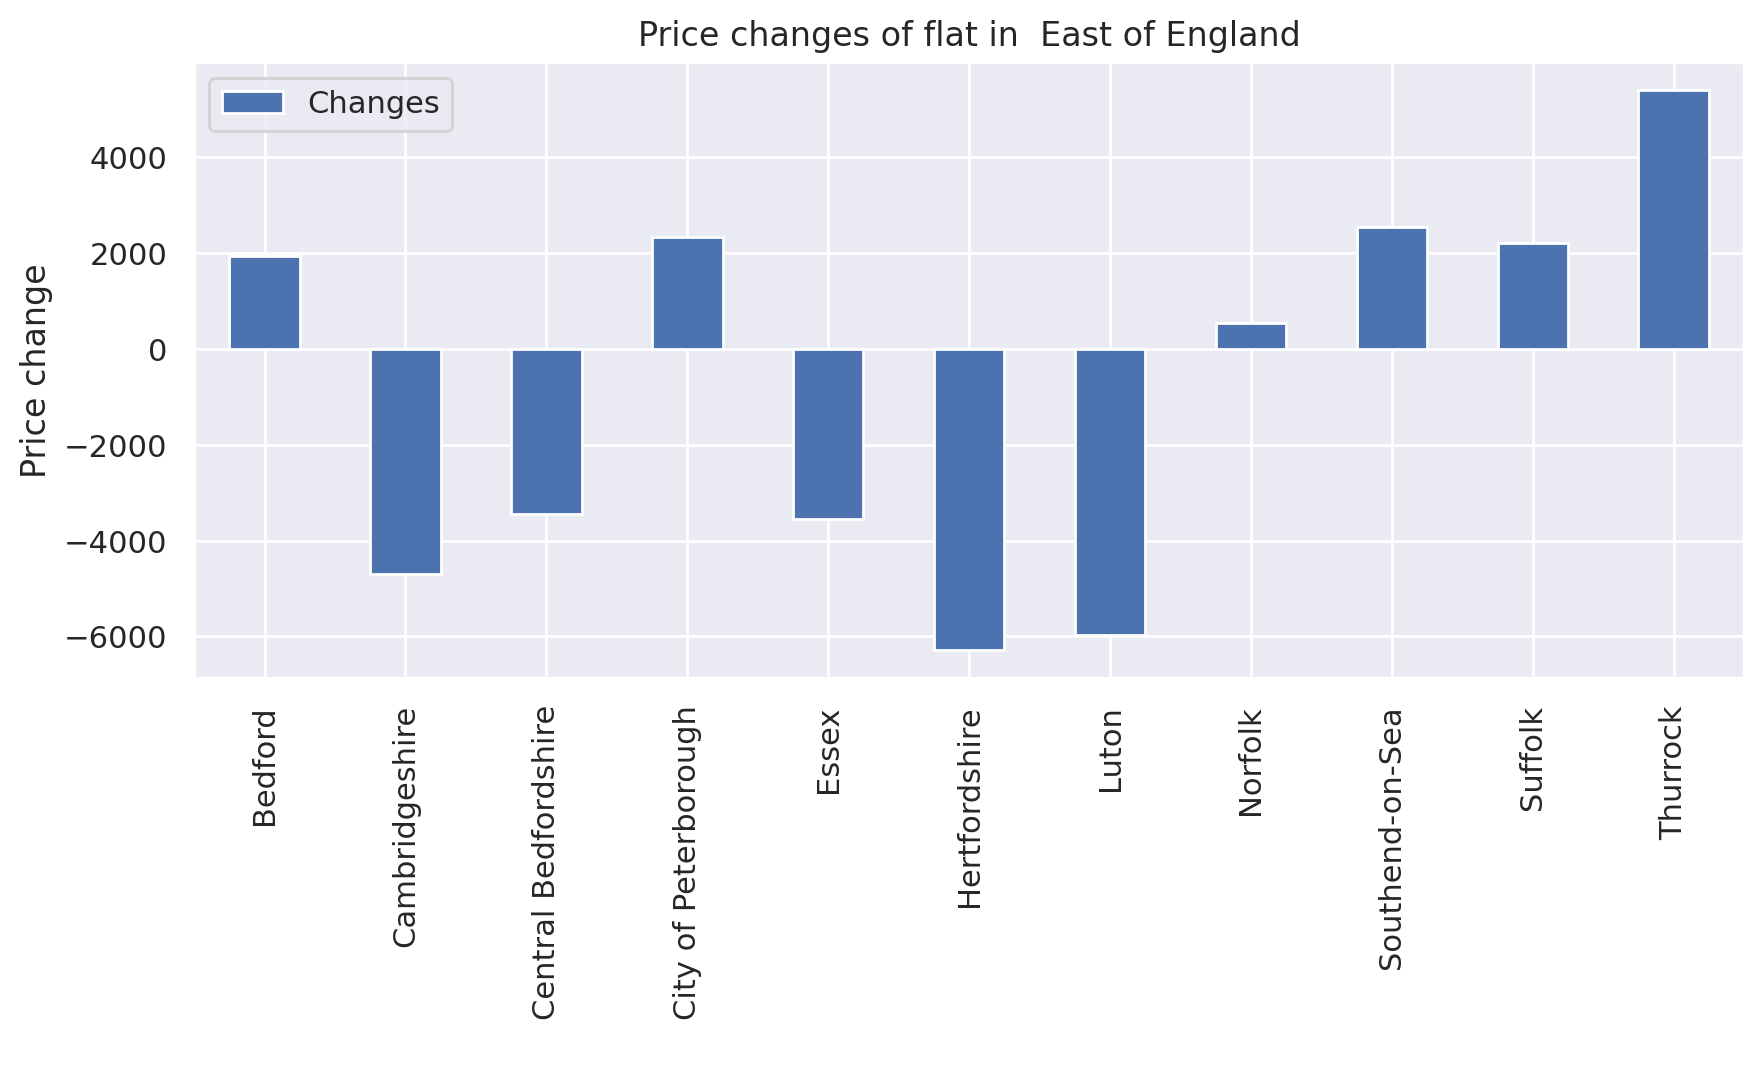

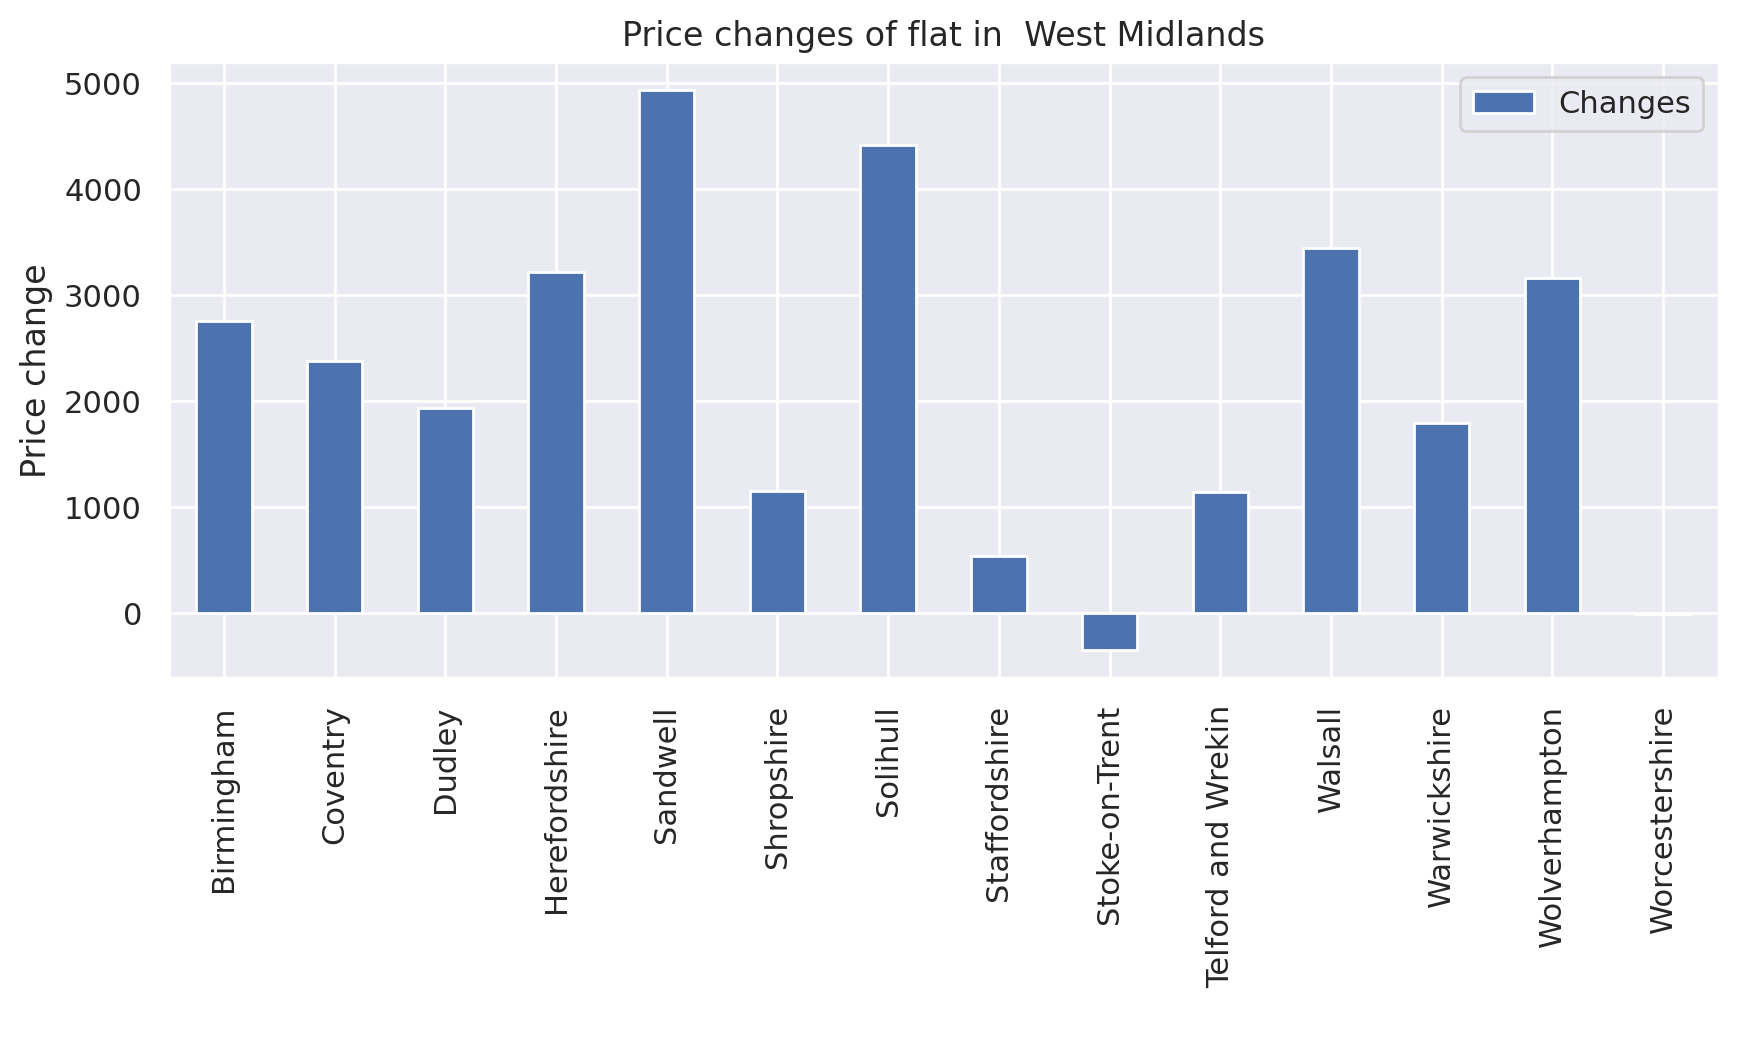

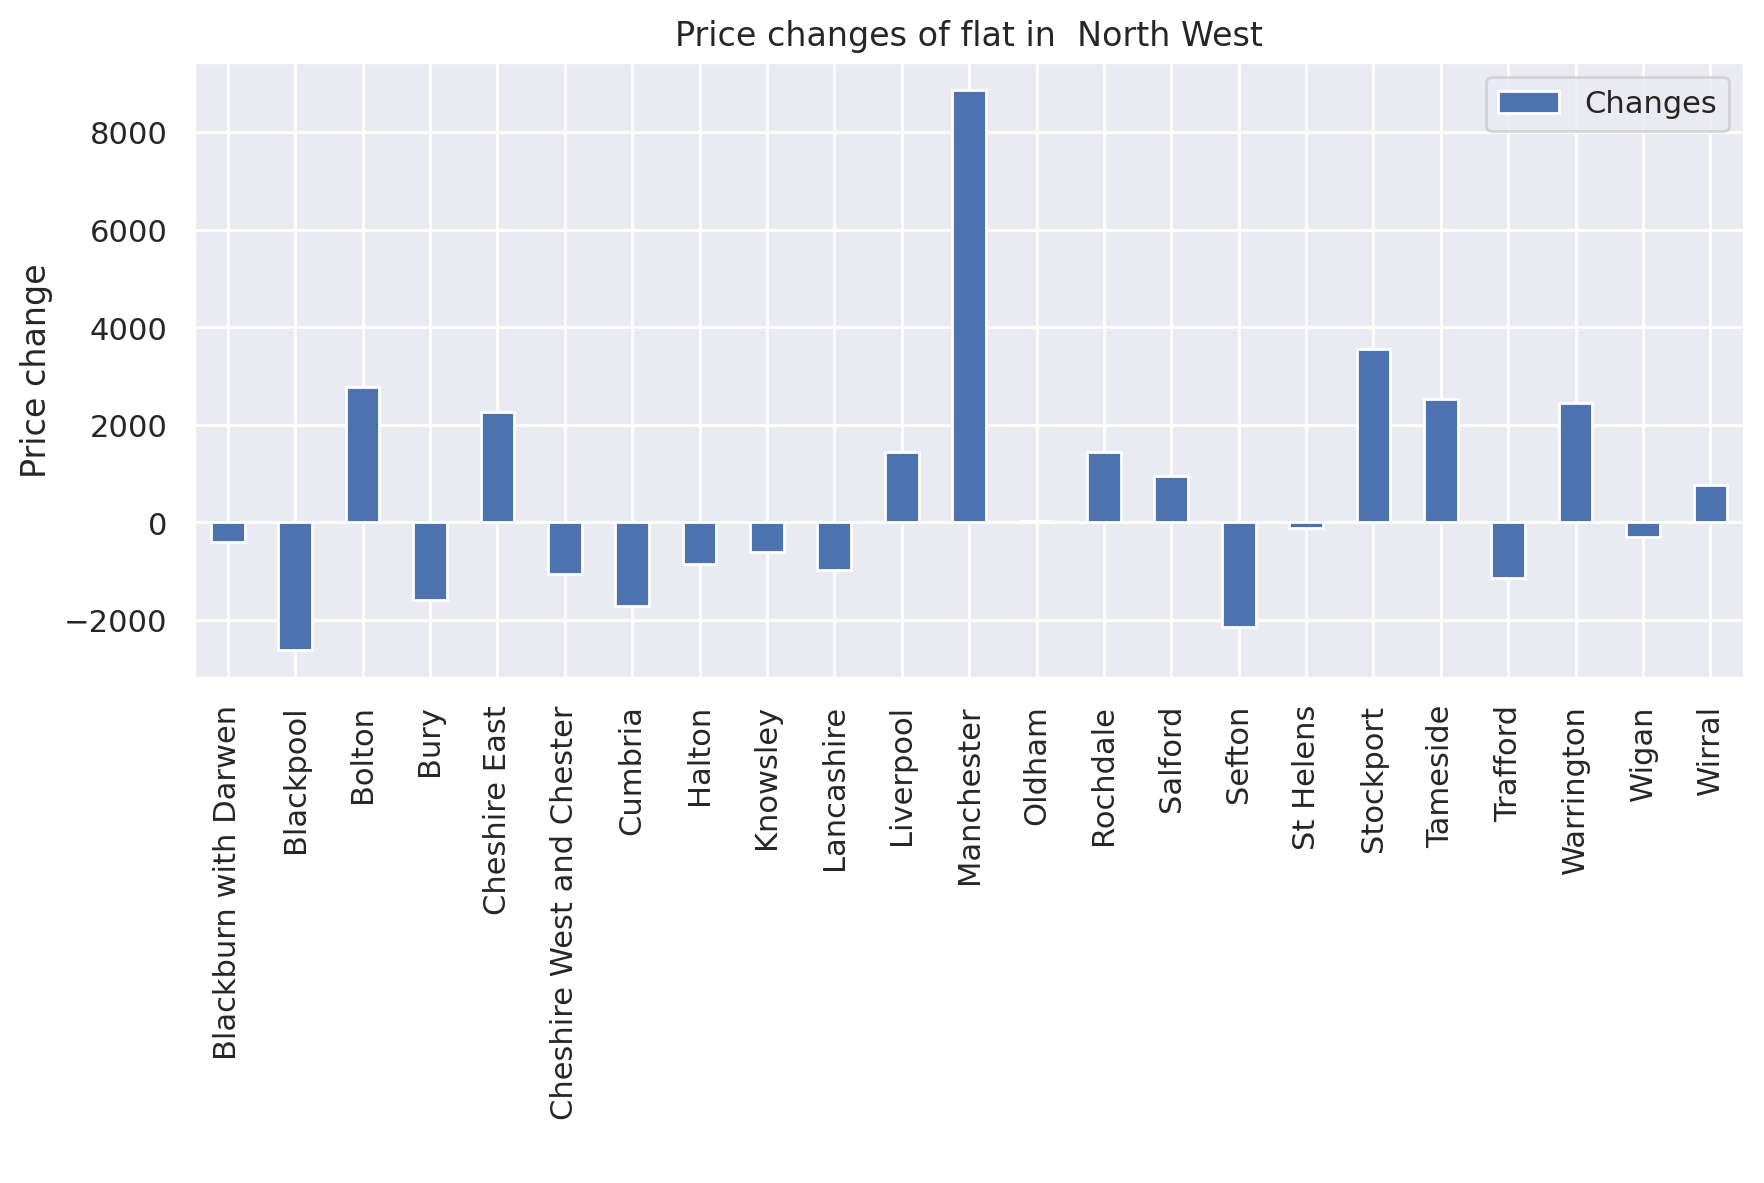

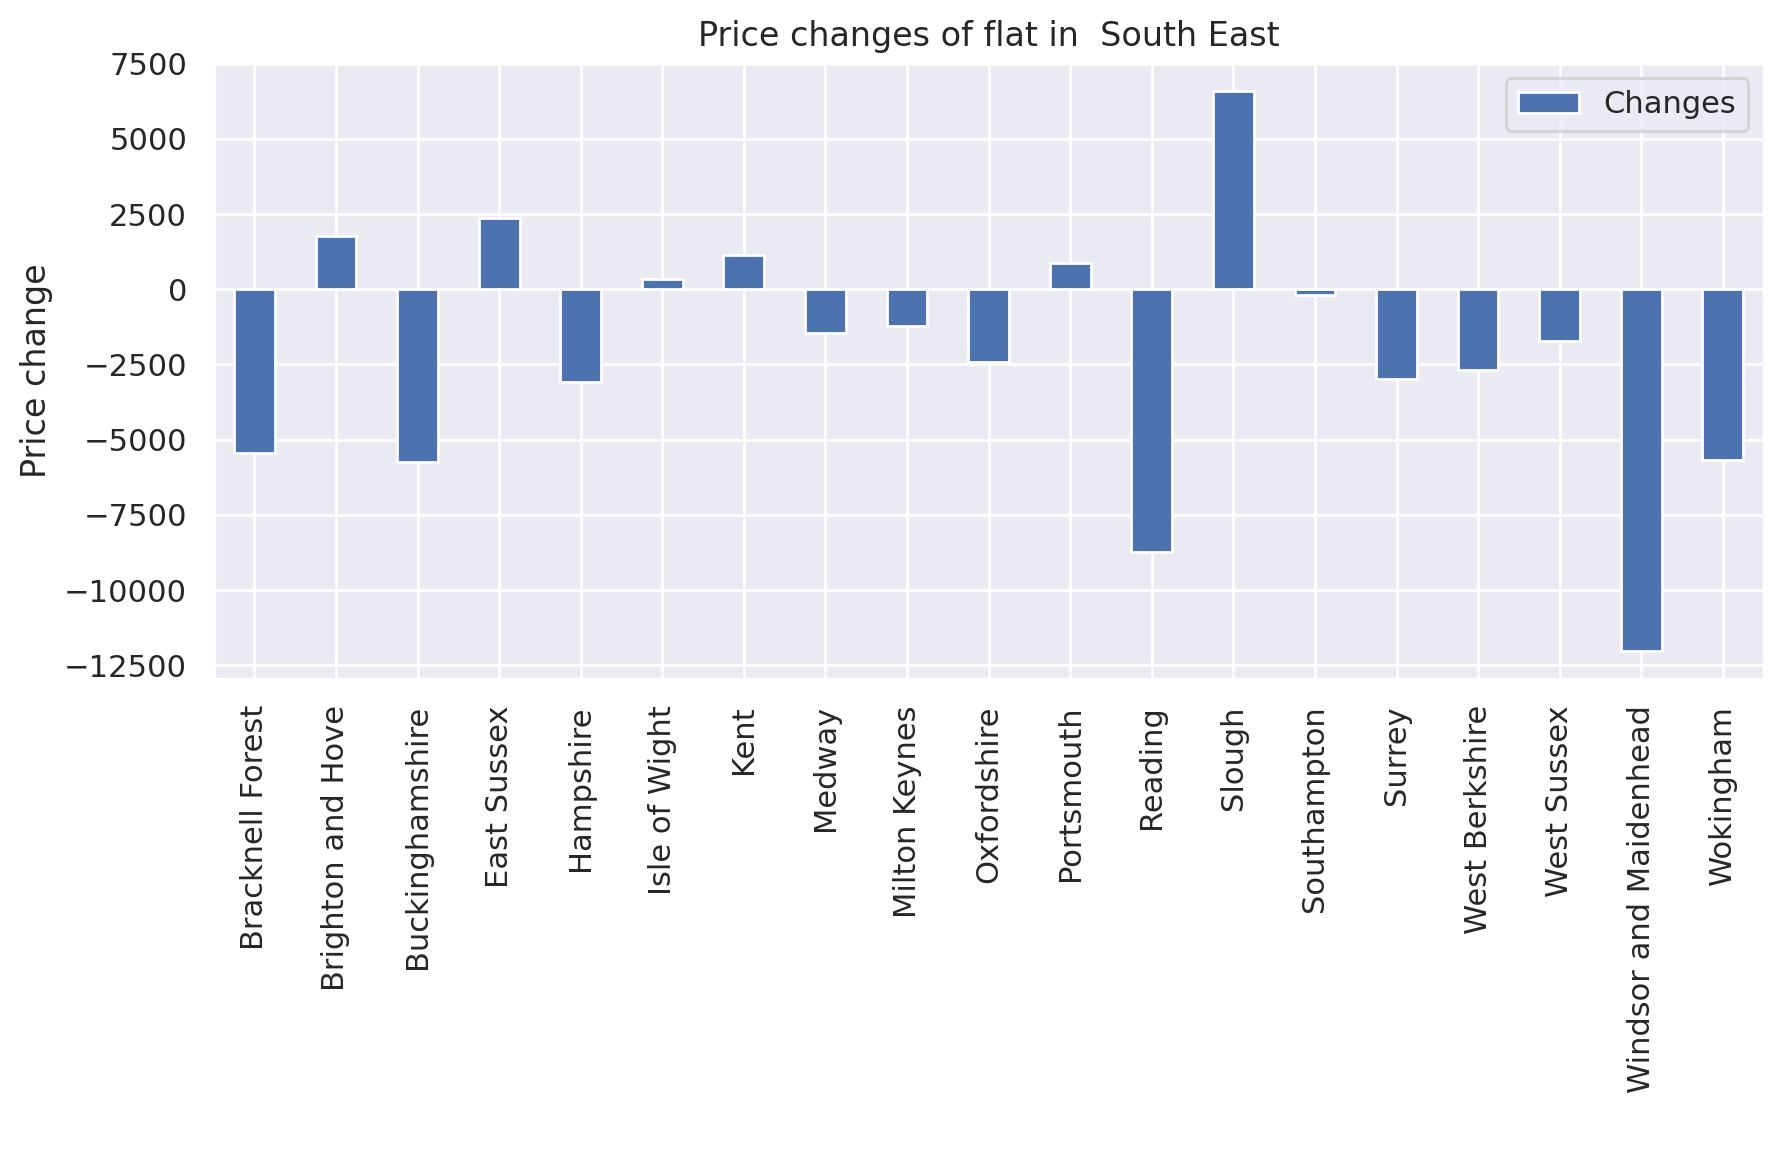

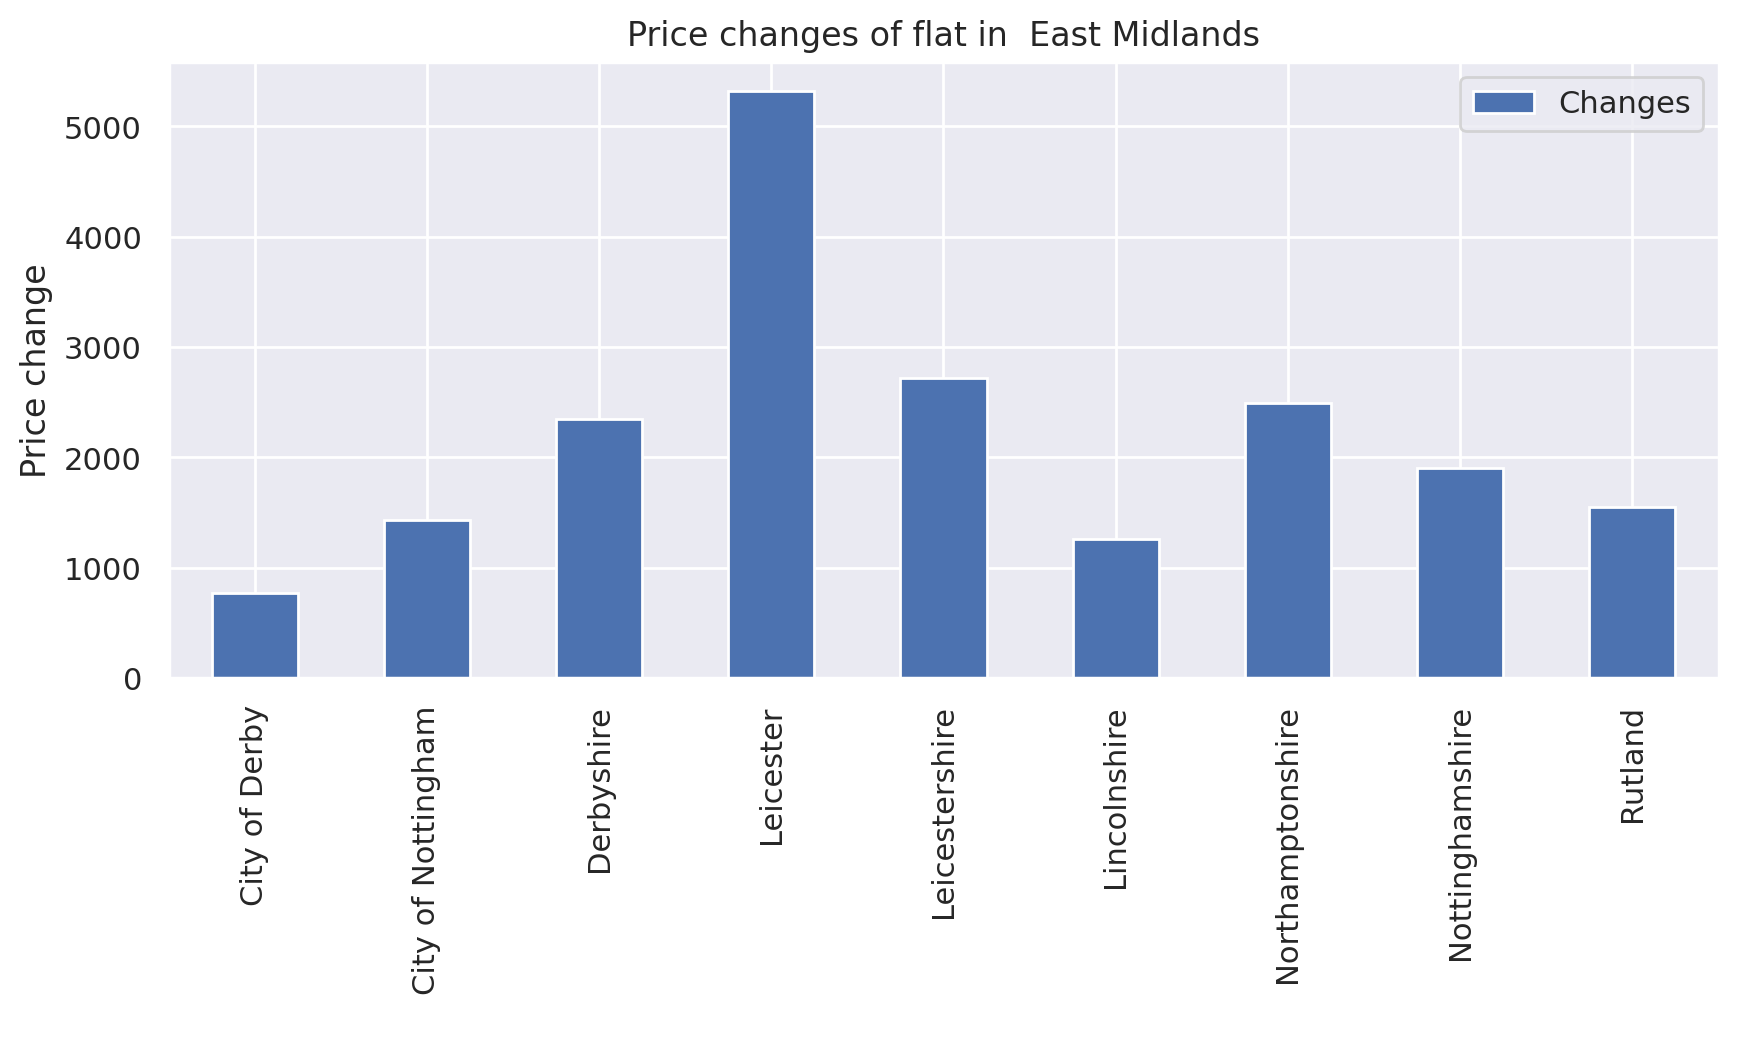

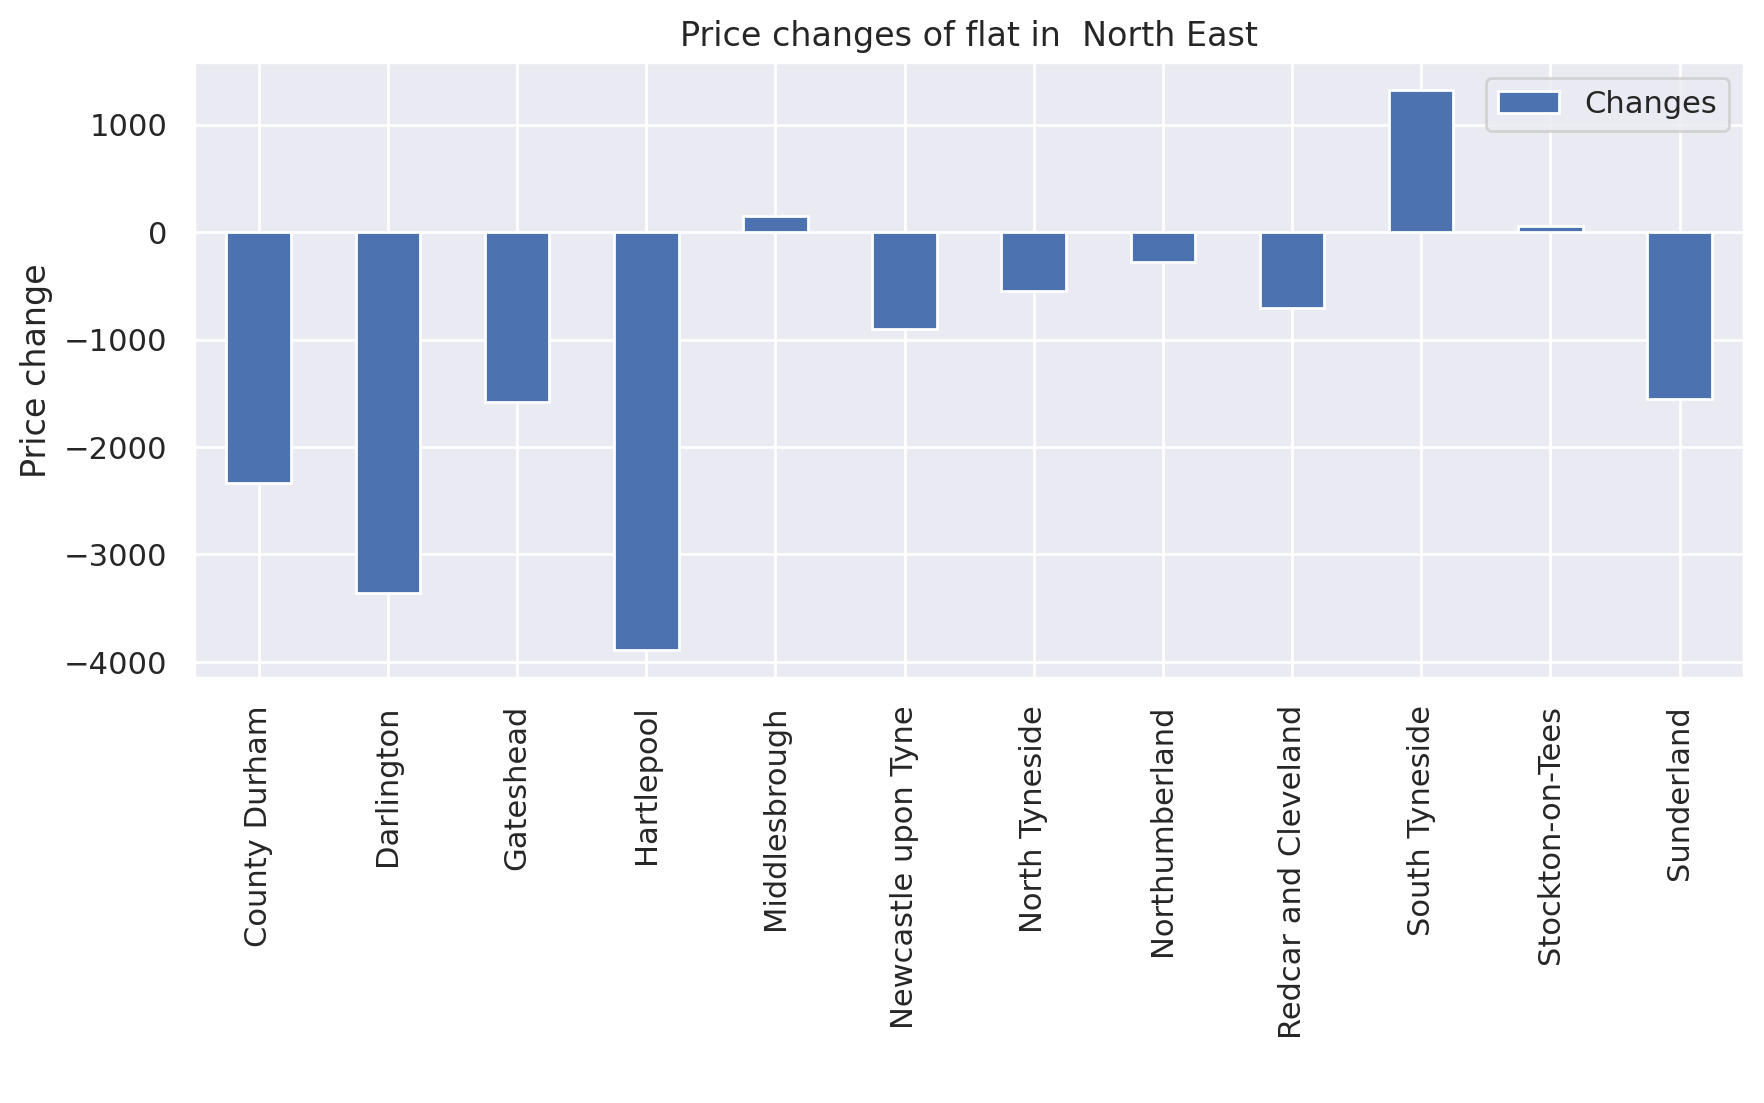

In [278]:
Names = Price_change.RegionName.unique()
Regions = Price_change.groupby(by = 'RegionName' )
for i in Names:
    Areas = Regions.get_group(i)
    Areas.plot.bar(x = 'Area', y = 'Changes', figsize = (10,4))
    plt.title('Price changes of flat in '+' ' + str(i))
    plt.ylabel('Price change') 
    plt.xlabel(' ')
    plt.show()

<font color='blue'> Comment : </font>

Bar charts show the price change of flat in all area between July 2017 and July 2018 in 9 regions.

From above bar charts, we can see price changes in specific areas. For example: biggest price change is City of Westminster  about -80000 in London region. In contrast, Kensington and Chelsea area increased in flat price.

## Section 5:  Statistical Analysis

In this section, using <font color='red'> Price_change  </font> data (calculated in the previous section) to investigate whether there is evidence that the change in the price of flats has affected all the regions similarly.

####  5.1 Contingency table of number of areas in which the price has increased and the number has decreased, by region
* Creating function <font color='red'> calc  </font> that determine whether area is decreased or increased
* Using the function assigning new column <font color='red'> Change  </font> to <font color='red'> Price_change  </font> data
* Cross-tabulating the number of areas in which the price has increased and the number has decreased, by region

In [279]:
# Creating function that determines Decrease or Increase
def calc(x):
    if x.Changes > 0:
        return 'Increased'
    else:
        return 'Decreased'
#applying function on Price_change and assigned new column
Price_change = Price_change.assign(Change = Price_change.apply(calc, axis = 1))
Price_change.head()

,Area,RegionName,Flat17,Flat18,Changes,Change
0,Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050,Decreased
1,Barnet,London,403492.77130,393139.28910,-10353.48220,Decreased
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813,Increased
3,Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720,Increased
4,Bedford,East of England,167562.35620,169497.10010,1934.74390,Increased


<font color='blue'> Comment : </font>

From above, we can see new column <font color='red'> Change  </font> added to <font color='red'> Price_change  </font> data

In [280]:
#Creating crosstab from Price_change
contingency_table = pd.crosstab(Price_change.Change, [Price_change.RegionName])
                           
contingency_table

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decreased,0,5,23,9,12,13,6,2,7
Increased,9,6,10,3,11,6,9,12,8


<font color='blue'> Comment : </font>

As shown in <font color='red'> contingency table </font>, we can see the number of areas in which the price has increased and the number has decreased, by region. For example, there are no areas in which the price has decreased in East Midlands region. The highest number of areas in which the price has increased and the number has decreased is in London region.

####  5.2 Chi-square test to regions differ
Using chi-square test to investigate whether there is evidence that the change in the price of flats has affected all the regions similarly.

* using contingency table and scipy.stats to find chi-square value, degrees of freedom and p-value

In [281]:
import scipy.stats as stats
test_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f' % (p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.001


<font color='blue'> Comment : </font>

The null hypothesis is the change in the price of flats has affected all the regions similarly. Assuming a significance level of 0.05, the probability that  would happen by chance is about 5%.

From our p-value shown above, there is a 0.1%  likelihood that null hypothesis is true. Thus, Given the p-value (0.001) which is lower than the significance level of 0.05, we reject the null hypothesis. This explains the change in the price of flats has affected all the regions differently and there is a high correlation between the prices of flats and regions.

<font color='blue'> Comment : </font>

As shown above, the chi-squared test statistic is 27.60, which represents a difference between sample data and the null hypothesis. The null hypothesis is represented by zero. This explains also change in the price of flats has affected all the regions differently.

### Conclusion

From above, the chi-square test can only tell us whether two variables are related. It does not follow that one variable has a causal effect on the other.

## Conclusion

The objective of this analysis is to investigate which of the variables age, average use, percent trucks, material or design have more influence on the current condition of the bridges. 
* The overall condition of the bridge was represented by an equal combination of the deck condition, the substructure condition and the super structure condition. 
* The age was calculated using the date of the data and the year the bridge was built. 
* The materials and design categories were simplified to have 4 and 6 categories respectively.
* The following cases were excluded: bridges 102 or more years old, those with missing condition values, and bridges in the worst condition (6 or lower - already failing). In total, 34,193 bridges were included in the analysis, 100 having been excluded.
* An exploratory analysis looked at the relationship between variables  
* A regression analysis predicted the condition from age, daily average, percentage of trucks, design and materials. 

The main findings of the exploratory analysis are as follows.

1. The condition distribution is quite symmetric with a mean between 20 and 21 (out of 27).
1. The predictors age, average use and percentage of trucks are not highly correlated; only age shows a high correlation with condition.
2. The materials and design are not independent with some materials not used or preferred for some designs.

The main findings of the regression analysis are as follows.

1. The regression explains a little less than 50% of the variability in condition. The RMS error is 1.4 points of the condition score.
2. Age is the most important predictor. 
3. Neither the daily average nor the percentage of trucks are important predictors: we speculate that although heavy use of a bridge accelerates deterioration, it also prioritizes repair. However, there we cannot investigate this further without data on repair. 
4. The materials and design predictors are intermediate in strength but the pattern is complex. Timber is the worst material and slab or 'other' the worst designs. However, timber is only used for beams designs (the default for design in the dummy variables used for regression) and the slab design implies the use of concrete.

Overall we conclude that the bridge condition declines with age but cannot be predicted very accurately with the proposed predictor variables.